<a href="https://colab.research.google.com/github/bw6259/memorable-intro/blob/master/Data_Health_Insurance_Predictions_MSc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alternative Hypothesis, that an accurate prediction of charges is possible using ML and data analysis

Null hypothesis, that an accurate prediction of charges is not possible using ML and data analysis.

Discuss why normalise didn't help (or standard_scaler())

In [2]:
import itertools
from sklearn import preprocessing
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('insurance.csv')
df = pd.DataFrame(file)
print(df.shape)
print(df.dtypes)
print(df.isnull().values.any())
print(df.head())

(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
False
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
"""
x = list(df.columns)
for y in x:
    df[y].value_counts().sort_values()
print(x)
"""

'\nx = list(df.columns)\nfor y in x:\n    df[y].value_counts().sort_values()\nprint(x)\n'

In [4]:
print(max(df['charges']))
print(min(df['charges']))

63770.42801
1121.8739


In [5]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
df = df[['age','sex','bmi','children','smoker','region','charges']]
df_dum = df[['age','sex','bmi','children','smoker','region','charges']]
df_dum['sex'] = df_dum['sex'].map({'female': 1, 'male': 0})
df_dum['smoker'] = df_dum['smoker'].map({'yes': 1, 'no': 0})
df_dum['region'] = df_dum['region'].map({'southwest': 0,'southeast': 1,'northeast':2,'northwest':3})

In [7]:
df_dum_charges = pd.DataFrame(df_dum['charges'])
df_dum2 = df_dum
df_dum2.drop('charges',axis=1,inplace=False)
df_dum2.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       0  16884.92400
1   18    0  33.770         1       0       1   1725.55230
2   28    0  33.000         3       0       1   4449.46200
3   33    0  22.705         0       0       3  21984.47061
4   32    0  28.880         0       0       3   3866.85520

              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


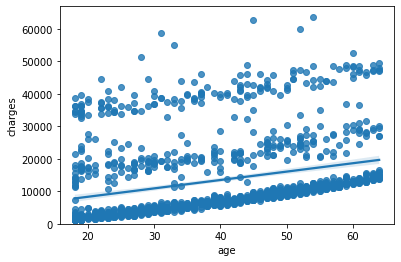

In [8]:
#age vs charges
sns.regplot(x="age", y="charges", data=df)
plt.ylim(0,)
print(df[["age","charges"]].corr())

#here we see that there are potentially 3 general groups of charges that apply, all gradually increasing with age.

              bmi   charges
bmi      1.000000  0.198341
charges  0.198341  1.000000


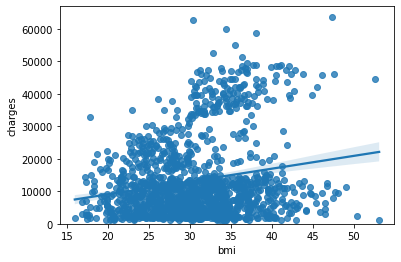

In [9]:
#bmi vs charges
sns.regplot(x="bmi", y="charges", data=df)
plt.ylim(0,)
print(df[["bmi","charges"]].corr())

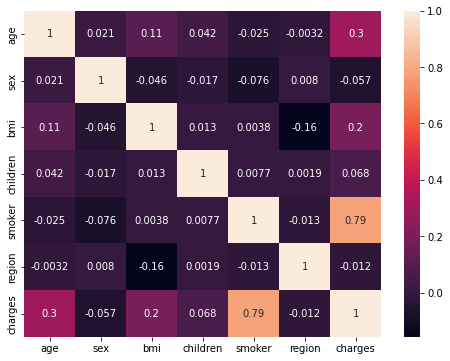

In [10]:
df_dum.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_dum.corr(), annot = True)

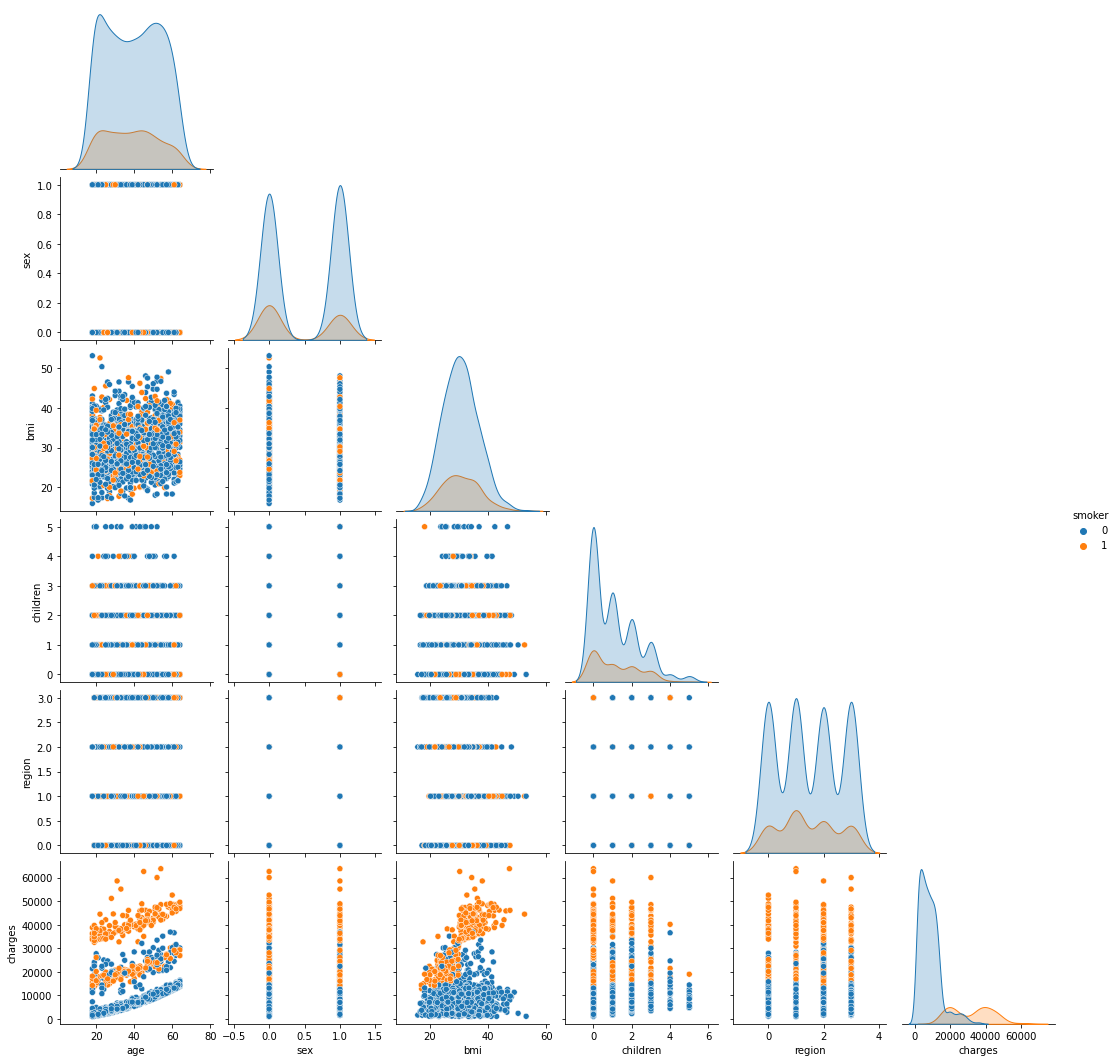

In [11]:
sns.pairplot(df_dum, hue="smoker", corner=True)

In [12]:
pearson_coef, p_value = stats.pearsonr(df_dum['smoker'], df_dum['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7872514304984775  with a P-value of P = 8.271435842176839e-283


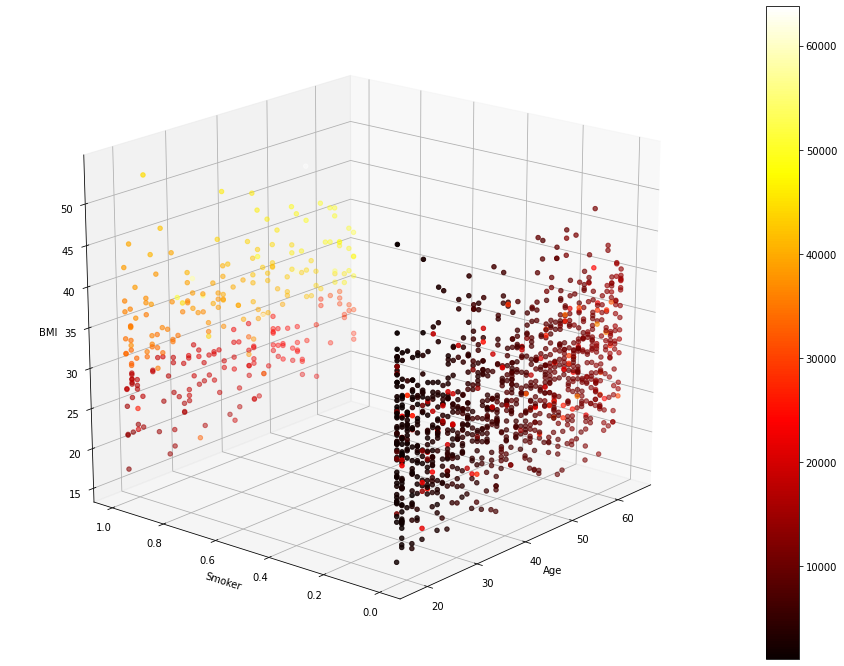

In [13]:
#4D graph
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')

x = df_dum['age']
y = df_dum['smoker']
z = df_dum['bmi']
c = df_dum['charges']

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('Age')
ax.set_ylabel('Smoker')
ax.set_zlabel('BMI')
ax.view_init(20, 220)
plt.show()

In [14]:
df_dum3 = df_dum2

In [15]:
bmi_categories = []

for x in df_dum3['bmi']:
    if x <18.5:
        bmi_categories.append(0)
    elif x>=18.5 and x<25:
        bmi_categories.append(1)
    elif x>=25 and x<30:
        bmi_categories.append(2)
    else:
        bmi_categories.append(3)
df_cats = df_dum3
df_cats['bmicat'] = bmi_categories
df_cats.head(10)

age  sex     bmi  children  smoker  region      charges  bmicat
0   19    1  27.900         0       1       0  16884.92400       2
1   18    0  33.770         1       0       1   1725.55230       3
2   28    0  33.000         3       0       1   4449.46200       3
3   33    0  22.705         0       0       3  21984.47061       1
4   32    0  28.880         0       0       3   3866.85520       2
5   31    1  25.740         0       0       1   3756.62160       2
6   46    1  33.440         1       0       1   8240.58960       3
7   37    1  27.740         3       0       3   7281.50560       2
8   37    0  29.830         2       0       2   6406.41070       2
9   60    1  25.840         0       0       3  28923.13692       2

### Scenario 1: Predicting BMI categories based on BMI score and charges with KNN

   Accuracy Score Training data  ...                              Classification report
0                      0.990864  ...                precision    recall  f1-score   ...

[1 rows x 5 columns]
   Accuracy Score Training data  ...                              Classification report
1                      0.987542  ...                precision    recall  f1-score   ...

[1 rows x 5 columns]
   Accuracy Score Training data  ...                              Classification report
2                       0.98505  ...                precision    recall  f1-score   ...

[1 rows x 5 columns]
   Accuracy Score Training data  ...                              Classification report
6                      0.985047  ...                precision    recall  f1-score   ...

[1 rows x 5 columns]
number of data points grouped by BMI category:
 3    707
2    386
1    225
0     20
Name: bmicat, dtype: int64


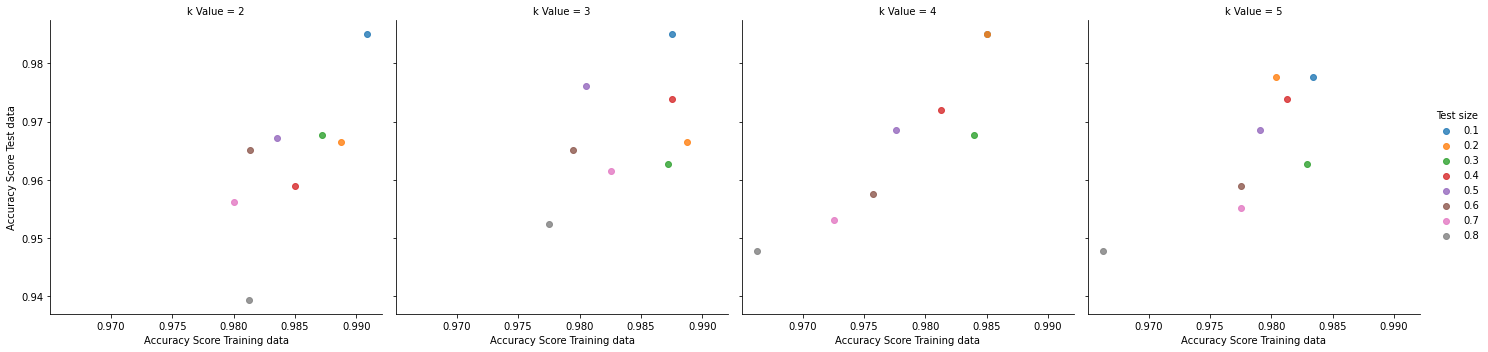

In [16]:
#k nearest neighbours used to predict potential number of BMI categories based only on data presented.
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = df_cats[['bmi', 'charges']]
y = df_cats['bmicat']
training_score = []
test_score = []
test_size = []
k_value = []
class_report = []
for num in range(1,9,1):
    for k in range(2,6,1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = (num/10))
        scaler = preprocessing.StandardScaler().fit(X_train) 
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test) 
        training_score.append(accuracy_score(y_train, knn.predict(X_train)))
        test_score.append(accuracy_score(y_test, y_pred))
        test_size.append(num/10)
        k_value.append(k)
        class_report.append(classification_report(y_test,y_pred))
knn_results_list = {"Accuracy Score Training data": training_score, "Accuracy Score Test data": test_score,
                    "Test size": test_size, "k Value": k_value, "Classification report": class_report}
knn_df = pd.DataFrame.from_dict(knn_results_list)
sns.lmplot(x="Accuracy Score Training data", y="Accuracy Score Test data", col="k Value", hue="Test size", data=knn_df)
print(knn_df[(knn_df["k Value"]==2)&(knn_df["Test size"]==0.1)])
print(knn_df[(knn_df["k Value"]==3)&(knn_df["Test size"]==0.1)])
print(knn_df[(knn_df["k Value"]==4)&(knn_df["Test size"]==0.1)])
print(knn_df[(knn_df["k Value"]==4)&(knn_df["Test size"]==0.2)])
print("number of data points grouped by BMI category:\n",df_cats["bmicat"].value_counts())

In [17]:
print(knn_df.iloc[2]["Classification report"])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.97        38
           3       0.99      1.00      0.99        73

    accuracy                           0.99       134
   macro avg       0.98      0.99      0.99       134
weighted avg       0.99      0.99      0.98       134



### Scenario 2: Identifying customer segments that would be high charge

   age  sex     bmi  children  smoker  region      charges  bmicat  k cluster
0   19    1  27.900         0       1       0  16884.92400       2          1
1   18    0  33.770         1       0       1   1725.55230       3          1
2   28    0  33.000         3       0       1   4449.46200       3          3
3   33    0  22.705         0       0       3  21984.47061       1          3
4   32    0  28.880         0       0       3   3866.85520       2          3


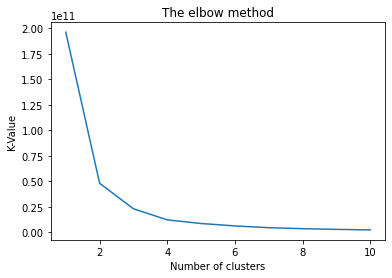

In [18]:
##https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#look at fit-predict and sample weights

#k-means, possibly use groupby() to identify 
from sklearn.cluster import KMeans 
k_means = KMeans(init="k-means++", n_clusters=4, n_init=20)
X = df_cats[['smoker', 'age', 'bmicat', 'sex', 'children', 'region']]
y = df_cats['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn_prediction = k_means.fit_predict(X,y)
knn_df_cats = df_cats
knn_df_cats["k cluster"] = knn_prediction
print(knn_df_cats.head(5))

kvalue = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(knn_df_cats)
    kvalue.append(kmeans.inertia_)
    
plt.plot(range(1, 11), kvalue)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('K-Value') 
plt.show()


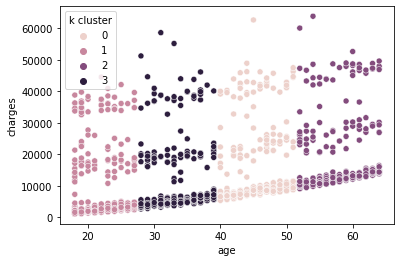

In [19]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=20)

sns.scatterplot(data=knn_df_cats, x="age", y="charges", hue="k cluster")

### Scenario 3: Predicting charges based on multiple linear regression and on Random Forest Regressor

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
#Use the bmicats instead of just BMI
X = df_cats[['smoker', 'age', 'bmicat', 'sex', 'children', 'region']]
y = df_cats['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (936, 6) (936,)
Test set: (402, 6) (402,)


In [22]:
#train data
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
yhat=lm.predict(X_train)
lm.intercept_
lm.coef_
mse = mean_squared_error(y_train, yhat)
print("For the training data:")
print("The mean square error of price and predicted value is: ", mse)
print("The R-square is: ", lm.score(X_train, y_train))

For the training data:
The mean square error of price and predicted value is:  37645567.09457275
The R-square is:  0.7329840918757349


In [23]:
#test data
yhat=lm.predict(X_test)
lm.intercept_
lm.coef_
mse = mean_squared_error(y_test, yhat)
print("For the test data:")
print("The mean square error of price and predicted value is: ", mse)
print("The R-square is: ", lm.score(X_test, y_test))

For the test data:
The mean square error of price and predicted value is:  34060174.1870115
The R-square is:  0.7864156993089357


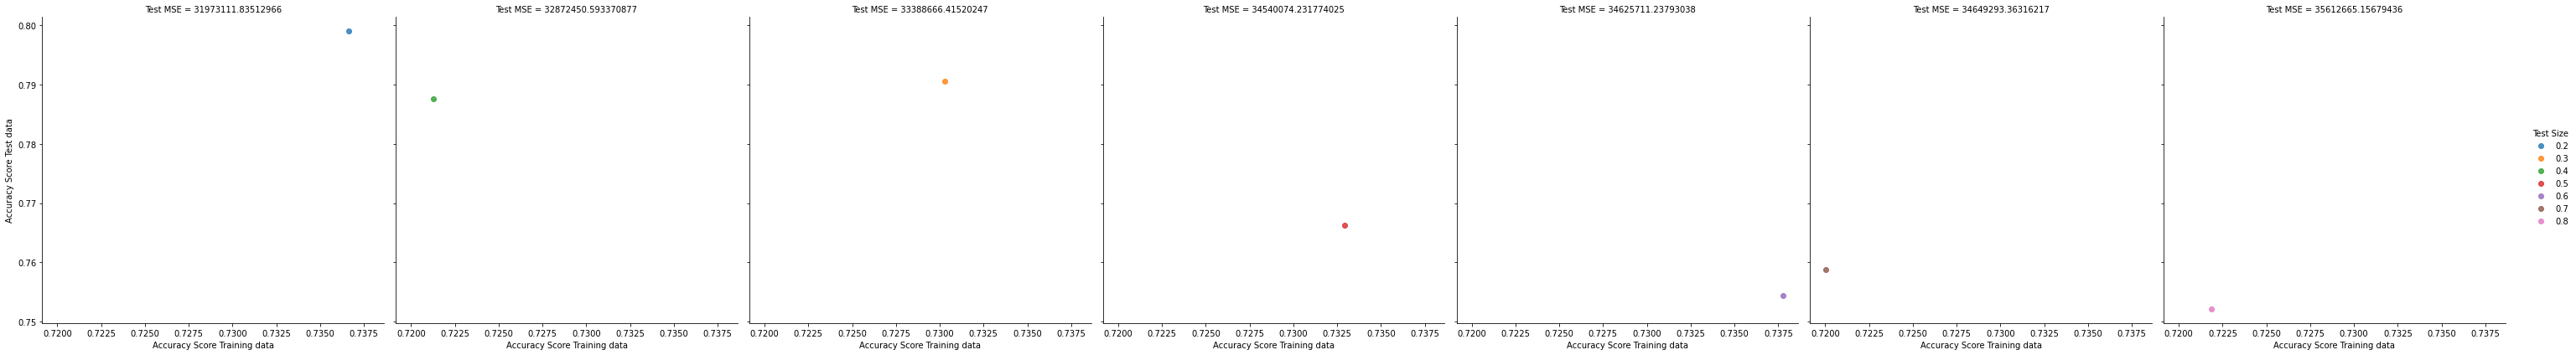

In [24]:
#Use bmi only, appears to be more accurate very slightly than using BMI categories
X = df_cats[['smoker', 'age', 'bmi', 'sex', 'children', 'region']]
y = df_cats['charges']

test_size_list = []
test_MSE_list = []
train_score_list = []
test_score_list = []

for num in range(2,9,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = num/10)
    scaler = preprocessing.StandardScaler().fit(X_train) 
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    lm = lm.fit(X_train, y_train)
    yhat=lm.predict(X_train)
    lm.intercept_
    lm.coef_
    mse = mean_squared_error(y_train, yhat)
    yhat=lm.predict(X_test)
    lm.intercept_
    lm.coef_
    mse = mean_squared_error(y_test, yhat)
    test_size_list.append(num/10)
    test_MSE_list.append(mse)
    train_score_list.append(lm.score(X_train, y_train))
    test_score_list.append(lm.score(X_test, y_test))
lm_results_list = {"Accuracy Score Training data":train_score_list, "Accuracy Score Test data":test_score_list, "Test Size":test_size_list, "Test MSE":test_MSE_list}
lm_df = pd.DataFrame.from_dict(lm_results_list)
sns.lmplot(x="Accuracy Score Training data", y="Accuracy Score Test data", col="Test MSE", hue="Test Size", data=lm_df, height=6, aspect=1.0)

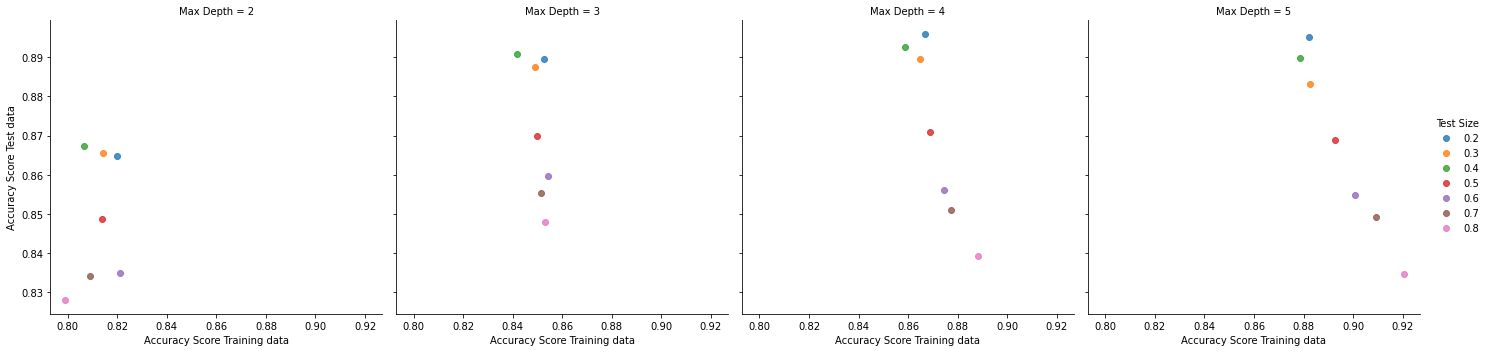

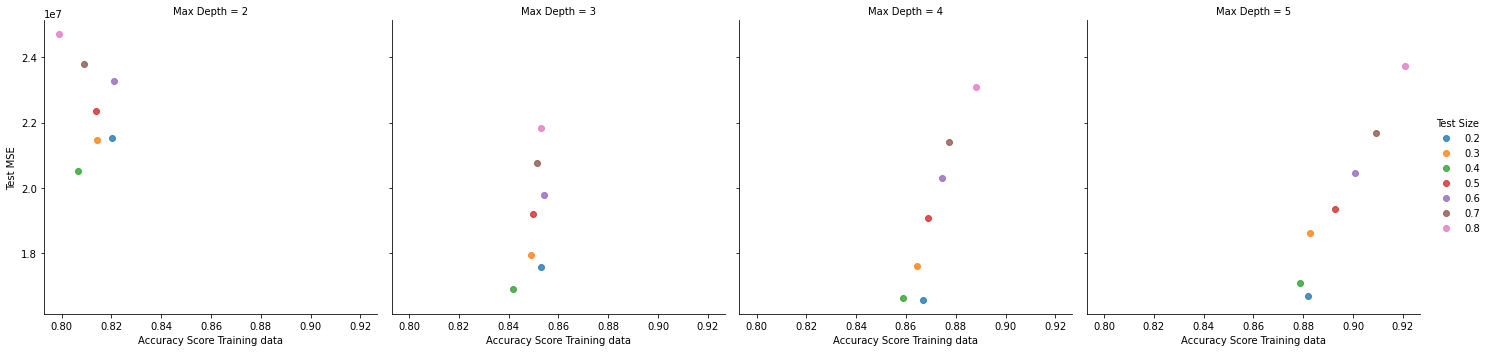

In [25]:
#using a random forest regresor
from sklearn.ensemble import RandomForestRegressor

train_score_list = []
test_score_list = []
max_depth_list = []
test_size_list = []
test_MSE_list = []
for depth in range(2,6,1):
    for num in range(2,9,1):
        regr = RandomForestRegressor(max_depth=depth, random_state=0)
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = num/10)
        scaler = preprocessing.StandardScaler().fit(X_train) 
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        regr.fit(X_train, y_train)
        yhat=regr.predict(X_train)
        mse = mean_squared_error(y_train, yhat)
        yhat=regr.predict(X_test)
        mse = mean_squared_error(y_test, yhat)
        train_score_list.append(regr.score(X_train, y_train))
        test_score_list.append(regr.score(X_test, y_test))
        max_depth_list.append(depth)
        test_size_list.append(num/10)
        test_MSE_list.append(mse)
regr_results_list = {"Accuracy Score Training data":train_score_list, "Accuracy Score Test data":test_score_list, "Max Depth":max_depth_list, "Test Size":test_size_list, "Test MSE":test_MSE_list}
regr_df = pd.DataFrame.from_dict(regr_results_list)
print(sns.lmplot(x="Accuracy Score Training data", y="Accuracy Score Test data", col="Max Depth", hue="Test Size", data=regr_df))
print(sns.lmplot(x="Accuracy Score Training data", y="Test MSE", col="Max Depth", hue="Test Size", data=regr_df))

In [26]:
print(regr_df[(regr_df["Max Depth"]==5)&(regr_df["Test Size"]==0.8)])

    Accuracy Score Training data  ...      Test MSE
27                      0.920735  ...  2.375174e+07

[1 rows x 5 columns]


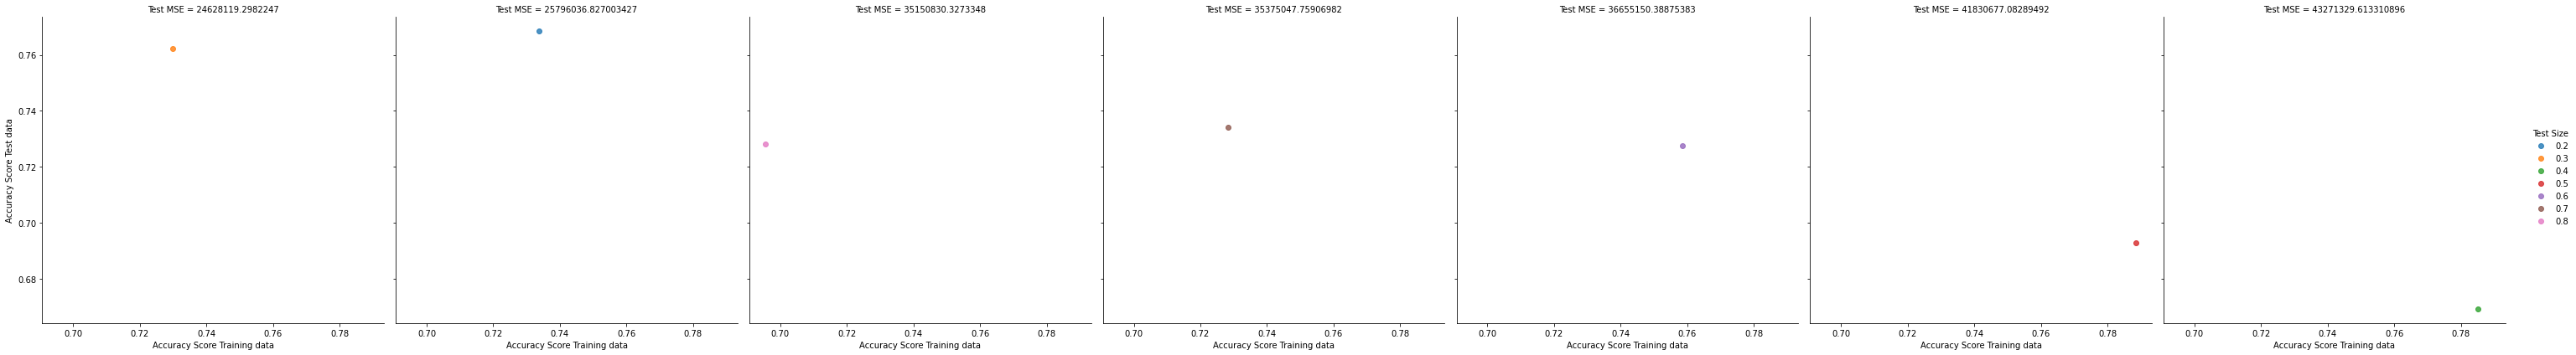

In [27]:
#Use bmi only, and also use must be smokers
smoker_only_df = df_cats[(df_cats["smoker"]!=0)&(df_cats["age"])&(df_cats["bmi"])&(df_cats["charges"])]
X = smoker_only_df[["smoker","age","bmi"]]
y = smoker_only_df["charges"]
lm = LinearRegression()
test_size_list = []
test_MSE_list = []
train_score_list = []
test_score_list = []
for num in range(2,9,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = num/10)
    scaler = preprocessing.StandardScaler().fit(X_train) 
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    lm = lm.fit(X_train, y_train)
    yhat=lm.predict(X_train)
    lm.intercept_
    lm.coef_
    mse = mean_squared_error(y_train, yhat)
    yhat=lm.predict(X_test)
    lm.intercept_
    lm.coef_
    mse = mean_squared_error(y_test, yhat)
    test_size_list.append(num/10)
    test_MSE_list.append(mse)
    train_score_list.append(lm.score(X_train, y_train))
    test_score_list.append(lm.score(X_test, y_test))
lm_results_list = {"Accuracy Score Training data":train_score_list, "Accuracy Score Test data":test_score_list, "Test Size":test_size_list, "Test MSE":test_MSE_list}
lm_df_smoker_only = pd.DataFrame.from_dict(lm_results_list)
sns.lmplot(x="Accuracy Score Training data", y="Accuracy Score Test data", col="Test MSE", hue="Test Size", data=lm_df_smoker_only, height=6, aspect=1.0)

   age  sex     bmi  children  ...      charges  bmicat  k cluster  gm cluster
0   19    1  27.900         0  ...  16884.92400       2          1           2
1   18    0  33.770         1  ...   1725.55230       3          1           1
2   28    0  33.000         3  ...   4449.46200       3          3           1
3   33    0  22.705         0  ...  21984.47061       1          3           3
4   32    0  28.880         0  ...   3866.85520       2          3           3

[5 rows x 10 columns]


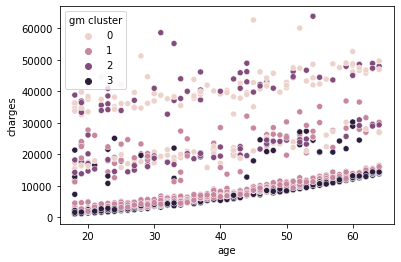

In [28]:
#clustering analysis should be followed by silhuette coefficient for clustering algorithms should be used

import numpy as np
from sklearn.mixture import GaussianMixture

X = df_cats[['smoker', 'age', 'bmicat', 'sex', 'children', 'region']]
y = df_cats['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
gm = GaussianMixture(n_components=4, random_state=0)

gm_prediction = gm.fit_predict(X,y)
gm_df_cats = df_cats
gm_df_cats["gm cluster"] = gm_prediction
print(gm_df_cats.head(5))
sns.scatterplot(data=gm_df_cats, x="age", y="charges", hue="gm cluster")


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


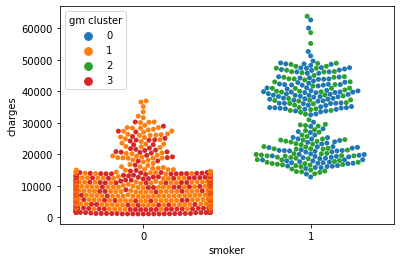

In [29]:
print(sns.swarmplot(data=gm_df_cats, x="smoker", y="charges", hue="gm cluster"))

In [30]:
#from sklearn.metrics import silhouette_score
#print(silhouette_score(X, gm_df_cats["gm cluster"]))

   age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
0   19    1  27.900         0  ...       2          1           2               0
1   18    0  33.770         1  ...       3          1           1               0
2   28    0  33.000         3  ...       3          3           1               0
3   33    0  22.705         0  ...       1          3           3               0
4   32    0  28.880         0  ...       2          3           3               0

[5 rows x 11 columns]


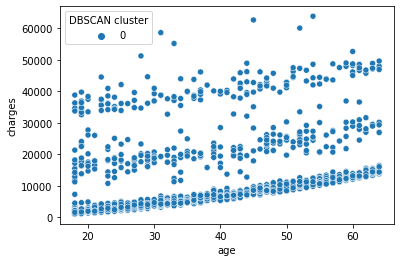

In [31]:
from sklearn.cluster import DBSCAN
import numpy as np

X = df_cats[['smoker', 'age', 'bmicat', 'sex', 'children', 'region']]
y = df_cats['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
DBSCAN = DBSCAN(eps=3, min_samples=10).fit(X)
DBSCAN.labels_

DBSCAN_prediction = DBSCAN.fit_predict(X,y)
DBSCAN_df_cats = df_cats
DBSCAN_df_cats["DBSCAN cluster"] = DBSCAN_prediction
print(DBSCAN_df_cats.head(5))
sns.scatterplot(data=DBSCAN_df_cats, x="age", y="charges", hue="DBSCAN cluster")

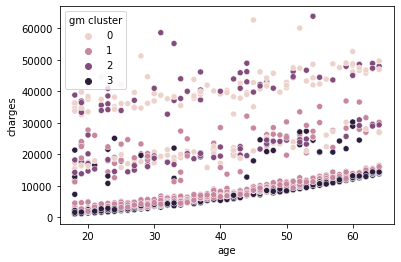

In [32]:
sns.scatterplot(data=gm_df_cats, x="age", y="charges", hue="gm cluster")

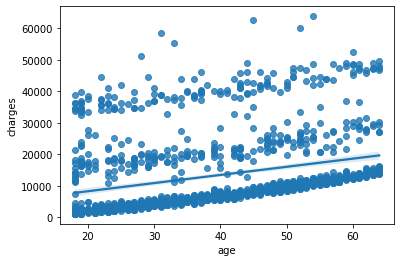

In [33]:
sns.regplot(x="age", y="charges", data=df_cats)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,0,0,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,0,0,1
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
172   18    0  15.960         0  ...       0          1           3               0
950   57    0  18.335         0  ...       0          2           3               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


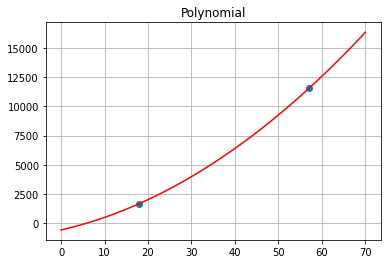

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
410   19    0  17.48         0  ...       0          1           3               0
821   26    0  17.67         0  ...       0          1           3               0

[2 rows x 11 columns]


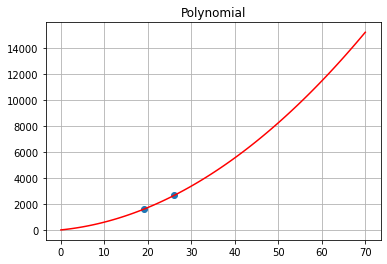

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
232   19    1  17.8         0  ...       0          1           3               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


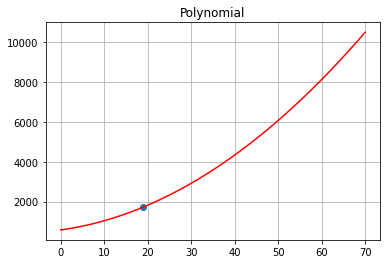

THIS DATAFRAME IS EMPTY:0,0,0,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,0,1,1
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1074   60    1  18.335         0  ...       0          2           3               0
1286   28    1  17.290         0  ...       0          3           3               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


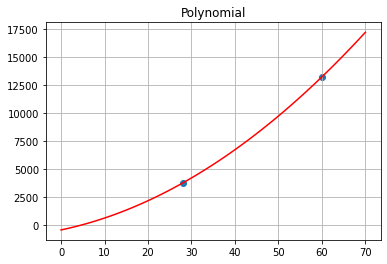

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
198    51    1  18.050         0  ...       0          0           3               0
1133   52    1  18.335         0  ...       0          2           3               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


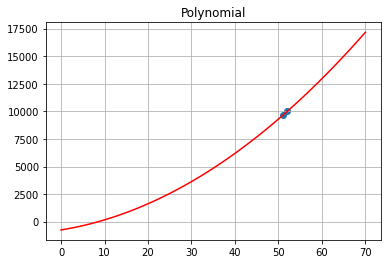

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,1,0,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,1,0,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,1,0,2
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
28     23    0  17.385         1  ...       0          1           1               0
1205   35    0  17.860         1  ...       0          3           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


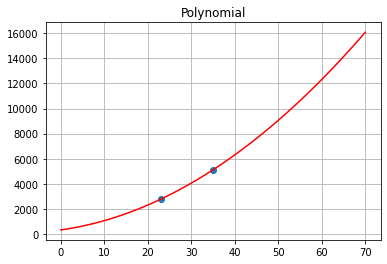

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
680   21    1  17.4         1  ...       0          1           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


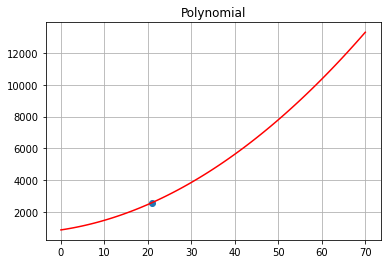

THIS DATAFRAME IS EMPTY:0,0,1,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,1,1,1
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
428   21    1  16.815         1  ...       0          1           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


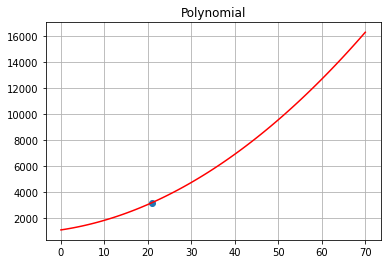

THIS DATAFRAME IS EMPTY:0,0,1,1,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,1,1,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,2,0,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,2,0,1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)



      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1226   38    0  16.815         2  ...       0          3           1               0

[1 rows x 11 columns]


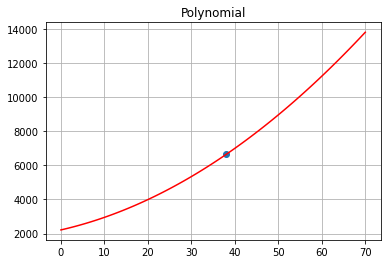

THIS DATAFRAME IS EMPTY:0,0,2,0,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,2,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,2,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,2,1,1
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1029   37    1  17.29         2  ...       0          3           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


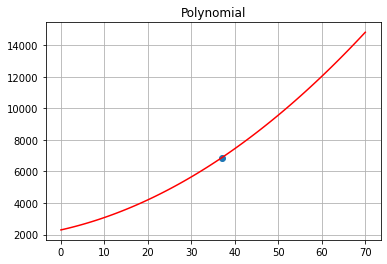

THIS DATAFRAME IS EMPTY:0,0,2,1,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,2,1,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,3,0,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,3,0,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,3,0,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,0,3,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: [

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


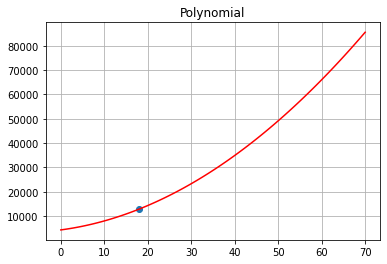

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


THIS DATAFRAME IS EMPTY:0,1,2,0,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,2,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,2,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,2,1,1
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
380   27    1  17.955         2  ...       0          1           2               0
412   26    1  17.195         2  ...       0          1           2               0

[2 rows x 11 columns]


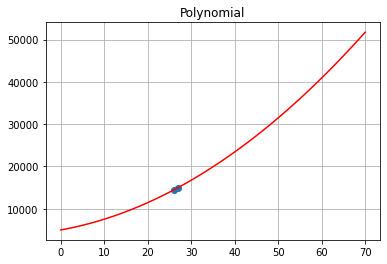

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
128   32    1  17.765         2  ...       0          3           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


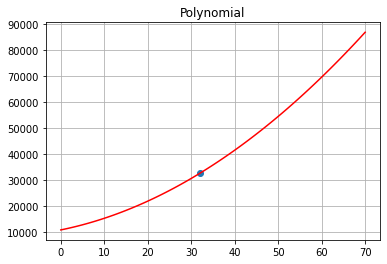

THIS DATAFRAME IS EMPTY:0,1,2,1,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,3,0,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,3,0,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,3,0,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,3,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,3,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: [

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


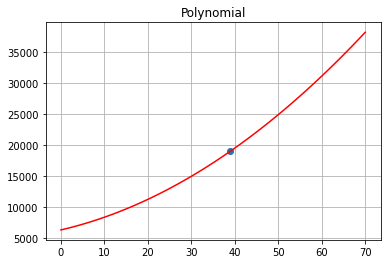

THIS DATAFRAME IS EMPTY:0,1,5,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,5,1,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,5,1,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:0,1,5,1,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
37     26    0  20.8         0  ...       1          1           3               0
204    46    0  22.3         0  ...       1          0           3               0
404    31    0  20.4         0  ...       1          3           3               0
452    24    0  23.4         0  ...       1          1           3               0
552    62    0  21.4         0  ...       1       

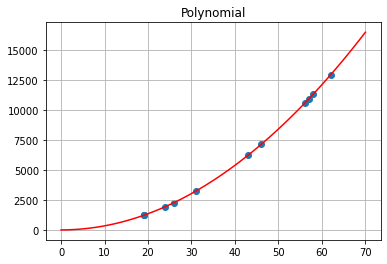

The Pearson Correlation Coefficient is 0.9926853522503261  with a P-value of P = 1.628979949810205e-10
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
217    27    0  23.10         0  ...       1          1           3               0
872    42    0  24.86         0  ...       1          0           3               0
940    18    0  23.21         0  ...       1          1           3               0
1292   21    0  23.21         0  ...       1          1           3               0

[4 rows x 11 columns]


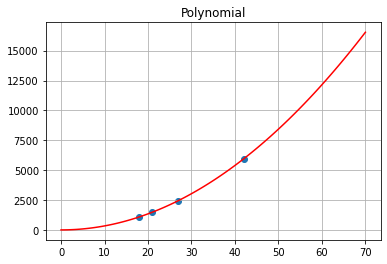

The Pearson Correlation Coefficient is 0.9953280167170548  with a P-value of P = 0.004671983282945158
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
17     23    0  23.845         0  ...       1          1           3               0
121    18    0  23.750         0  ...       1          1           3               0
295    18    0  22.990         0  ...       1          1           3               0
512    51    0  22.420         0  ...       1          0           3               0
841    59    0  24.700         0  ...       1          2           3               0
868    61    0  23.655         0  ...       1          2           3               0
892    54    0  24.035         0  ...       1          2           3               0
900    49    0  22.515         0  ...       1          0           3               0
981    34    0  21.375         0  ...       1          3           3               0
1041   18    0  23.085         0  ...       1   

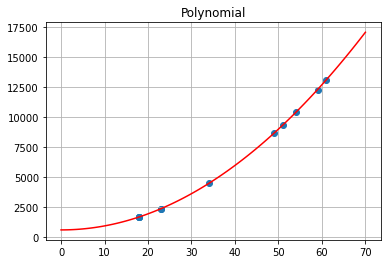

The Pearson Correlation Coefficient is 0.9937092218703752  with a P-value of P = 7.677388591978451e-11
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
3      33    0  22.705         0  ...       1          3           3               0
35     19    0  20.425         0  ...       1          1           3               0
395    46    0  19.855         0  ...       1          0           3               0
675    45    0  21.375         0  ...       1          0           3               0
683    53    0  24.320         0  ...       1          2           3               0
693    24    0  23.655         0  ...       1          1           3               0
747    19    0  21.755         0  ...       1          1           3               0
824    60    0  24.320         0  ...       1          2           3               0
943    19    0  22.610         0  ...       1          1           3               0
1027   23    0  18.715         0  ...       1  

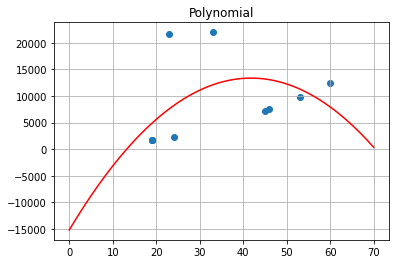

The Pearson Correlation Coefficient is 0.2882299481743171  with a P-value of P = 0.4193176905752884
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
277    22    1  24.3         0  ...       1          1           3               0
311    19    1  24.7         0  ...       1          1           3               0
400    51    1  20.6         0  ...       1          0           3               0
714    24    1  22.6         0  ...       1          1           3               0
848    27    1  24.1         0  ...       1          1           3               0
1010   48    1  22.8         0  ...       1          0           3               0
1129   19    1  18.6         0  ...       1          1           3               0
1316   19    1  20.6         0  ...       1          1           3               0

[8 rows x 11 columns]


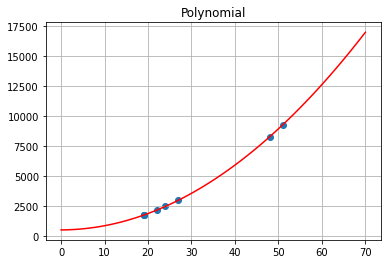

The Pearson Correlation Coefficient is 0.9968011672464074  with a P-value of P = 8.16341924764299e-08
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
48     60    1  24.53         0  ...       1          2           3               0
219    24    1  23.21         0  ...       1          1           3               0
359    18    1  20.79         0  ...       1          1           3               0
406    33    1  24.31         0  ...       1          3           3               0
753    58    1  22.77         0  ...       1          2           3               0
1142   52    1  24.86         0  ...       1          2           3               0

[6 rows x 11 columns]


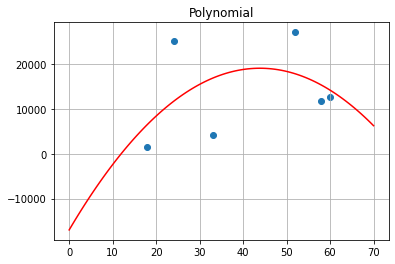

The Pearson Correlation Coefficient is 0.2686200675833166  with a P-value of P = 0.6067612729078751
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
26     63    1  23.085         0  ...       1          2           3               0
131    61    1  22.040         0  ...       1          2           3               0
371    57    1  22.230         0  ...       1          2           3               0
579    25    1  23.465         0  ...       1          1           3               0
792    22    1  23.180         0  ...       1          1           3               0
863    36    1  19.855         0  ...       1          3           3               0
882    21    1  22.135         0  ...       1          1           3               0
971    34    1  23.560         0  ...       1          3           3               0
1236   63    1  21.660         0  ...       1          2           3               0
1259   52    1  23.180         0  ...       1     

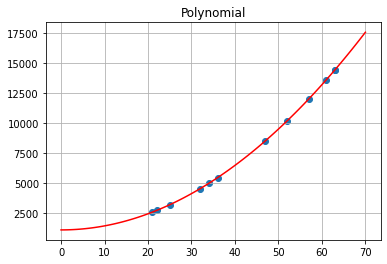

The Pearson Correlation Coefficient is 0.9926099650134304  with a P-value of P = 1.7144562508446836e-10
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
202    60    1  24.035         0  ...       1          2           3               0
350    57    1  23.180         0  ...       1          2           3               0
370    61    1  21.090         0  ...       1          2           3               0
388    26    1  22.610         0  ...       1          1           3               0
816    24    1  24.225         0  ...       1          1           3               0
899    19    1  22.515         0  ...       1          1           3               0
972    22    1  20.235         0  ...       1          1           3               0
1054   27    1  21.470         0  ...       1          1           3               0
1137   26    1  22.230         0  ...       1          1           3               0
1194   31    1  21.755         0  ...       1 

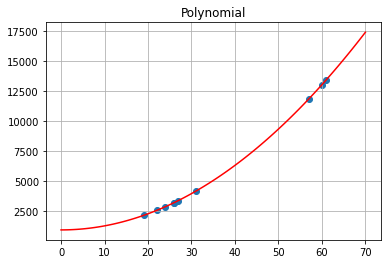

The Pearson Correlation Coefficient is 0.9968597589424373  with a P-value of P = 4.2383080348969775e-10
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
15     19    0  24.6         1  ...       1          1           1               0
248    19    0  20.9         1  ...       1          1           1               0
731    53    0  21.4         1  ...       1          2           1               0
802    21    0  22.3         1  ...       1          1           1               0
1148   55    0  21.5         1  ...       1          2           1               0
1295   20    0  22.0         1  ...       1          1           1               0

[6 rows x 11 columns]


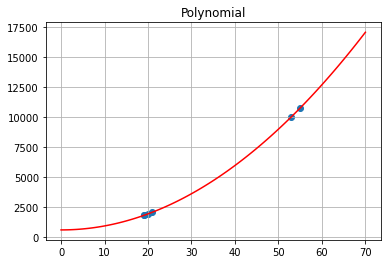

The Pearson Correlation Coefficient is 0.9996764829898114  with a P-value of P = 1.5697795365026884e-07
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
42     41    0  21.78         1  ...       1          0           1               0
1023   18    0  23.32         1  ...       1          1           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


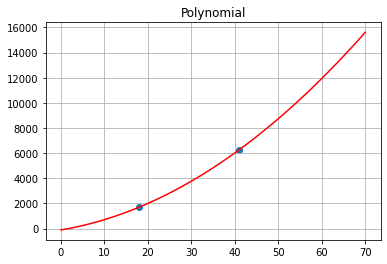

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1004   47    0  19.19         1  ...       1          0           1               0
1224   41    0  23.94         1  ...       1          0           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


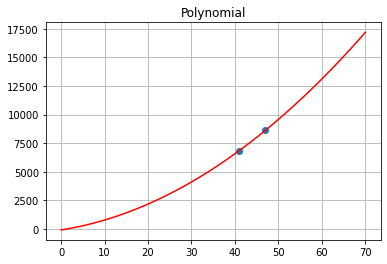

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
62     64    0  24.70         1  ...       1          2           1               0
150    35    0  24.13         1  ...       1          3           1               0
451    30    0  24.13         1  ...       1          3           1               0
591    47    0  19.57         1  ...       1          0           1               0
717    60    0  24.32         1  ...       1          2           1               0
829    39    0  21.85         1  ...       1          3           1               0
1068   63    0  21.66         1  ...       1          2           1               0
1082   38    0  19.95         1  ...       1          3           1               0

[8 rows x 11 columns]


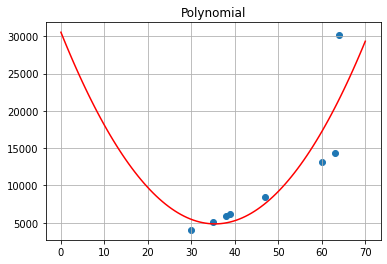

The Pearson Correlation Coefficient is 0.8287390042018336  with a P-value of P = 0.011000099298705376
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
407    47    1  23.6         1  ...       1          0           1               0
622    49    1  21.3         1  ...       1          0           1               0
684    33    1  18.5         1  ...       1          3           1               0
688    47    1  24.1         1  ...       1          0           1               0
927    57    1  20.1         1  ...       1          2           1               0
990    26    1  19.8         1  ...       1          1           1               0
1302   25    1  20.8         1  ...       1          1           1               0

[7 rows x 11 columns]


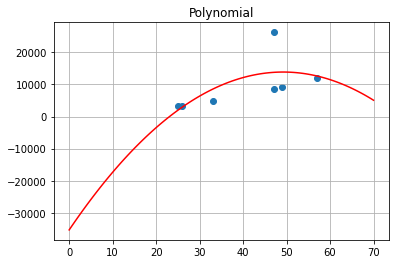

The Pearson Correlation Coefficient is 0.6038671489348185  with a P-value of P = 0.1510342281124044
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
279   51    1  21.56         1  ...       1          0           1               0
326   27    1  23.21         1  ...       1          1           1               0
469   18    1  24.09         1  ...       1          1           1               0
583   32    1  23.65         1  ...       1          3           1               0
661   57    1  23.98         1  ...       1          2           1               0

[5 rows x 11 columns]


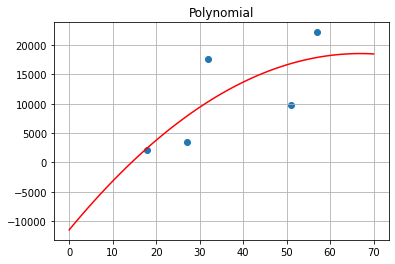

The Pearson Correlation Coefficient is 0.7267385408789544  with a P-value of P = 0.16426531647666853
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
241    33    1  22.135         1  ...       1          3           1               0
468    28    1  24.320         1  ...       1          3           1               0
797    30    1  22.895         1  ...       1          3           1               0
1191   41    1  21.755         1  ...       1          0           1               0
1220   30    1  21.945         1  ...       1          3           1               0

[5 rows x 11 columns]


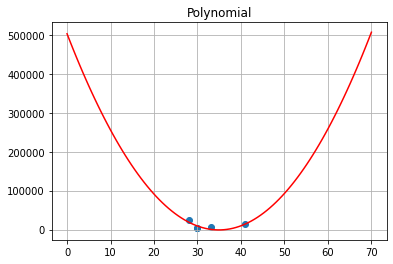

The Pearson Correlation Coefficient is -0.02308509845127538  with a P-value of P = 0.9706097506489852
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
91     53    1  24.795         1  ...       1          2           1               0
636    19    1  24.510         1  ...       1          1           1               0
716    49    1  22.610         1  ...       1          0           1               0
1016   19    1  24.605         1  ...       1          1           1               0
1048   25    1  22.515         1  ...       1          1           1               0

[5 rows x 11 columns]


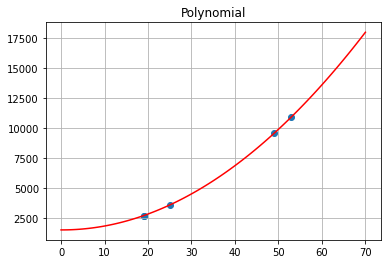

The Pearson Correlation Coefficient is 0.997716882901822  with a P-value of P = 0.00013091136448791117
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
555   28    0  23.8         2  ...       1          3           1               0
737   26    0  23.7         2  ...       1          1           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


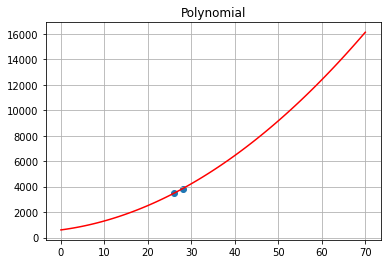

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
812    54    0  21.01         2  ...       1          2           1               0
1080   18    0  21.78         2  ...       1          1           1               0
1221   40    0  24.97         2  ...       1          0           1               0

[3 rows x 11 columns]


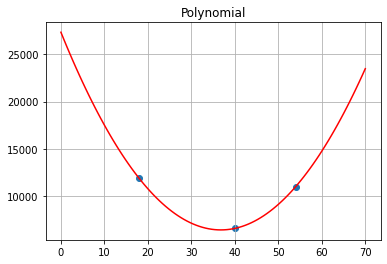

The Pearson Correlation Coefficient is -0.27790330519115863  with a P-value of P = 0.820721031252921
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
140    34    0  22.420         2  ...       1          3           1               0
384    44    0  22.135         2  ...       1          0           1               0
633    40    0  22.705         2  ...       1          0           1               0
740    45    0  24.035         2  ...       1          0           1               0
813    28    0  22.515         2  ...       1          3           1               0
1008   25    0  24.985         2  ...       1          1           1               0
1185   45    0  23.560         2  ...       1          0           1               0

[7 rows x 11 columns]


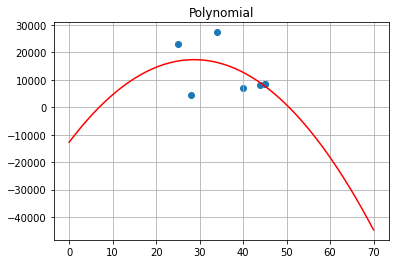

The Pearson Correlation Coefficient is -0.4659068630988256  with a P-value of P = 0.2920247631852911
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
234    39    0  24.510         2  ...       1          3           1               0
276    19    0  20.615         2  ...       1          1           1               0
507    21    0  23.750         2  ...       1          1           1               0
914    33    0  24.605         2  ...       1          3           1               0
1200   37    0  24.320         2  ...       1          3           1               0

[5 rows x 11 columns]


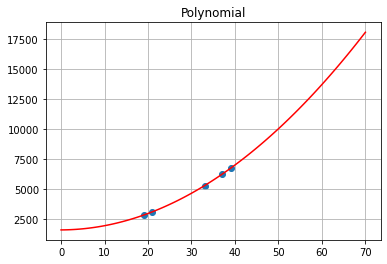

The Pearson Correlation Coefficient is 0.9979719815789676  with a P-value of P = 0.00010959974483081621
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
496    31    1  23.6         2  ...       1          3           1               0
926    19    1  23.4         2  ...       1          1           1               0
1167   29    1  24.6         2  ...       1          3           1               0

[3 rows x 11 columns]


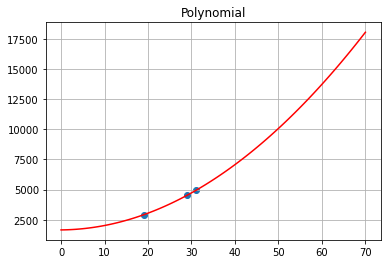

The Pearson Correlation Coefficient is 0.9994485852627234  with a P-value of P = 0.02114239895631567
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
364   21    1  21.89         2  ...       1          1           1               0
498   44    1  23.98         2  ...       1          0           1               0
711   50    1  23.54         2  ...       1          0           1               0

[3 rows x 11 columns]


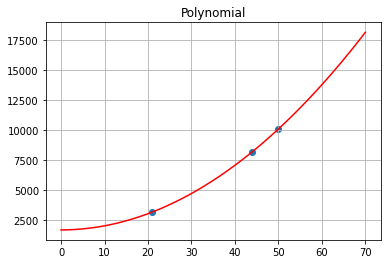

The Pearson Correlation Coefficient is 0.9974950356374326  with a P-value of P = 0.04506990015649508
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
838    35    1  23.465         2  ...       1          3           1               0
853    53    1  23.750         2  ...       1          2           1               0
1290   38    1  19.950         2  ...       1          3           1               0
1328   23    1  24.225         2  ...       1          1           1               0

[4 rows x 11 columns]


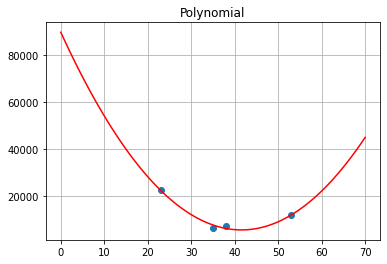

The Pearson Correlation Coefficient is -0.5255334593628785  with a P-value of P = 0.47446654063712146
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
119    37    1  23.370         2  ...       1          3           1               0
367    42    1  24.985         2  ...       1          0           1               0
431    29    1  20.235         2  ...       1          3           1               0
560    46    1  19.950         2  ...       1          0           1               0
679    49    1  23.180         2  ...       1          0           1               0
769    38    1  19.475         2  ...       1          3           1               0
832    28    1  23.845         2  ...       1          3           1               0
1157   23    1  23.180         2  ...       1          1           1               0

[8 rows x 11 columns]


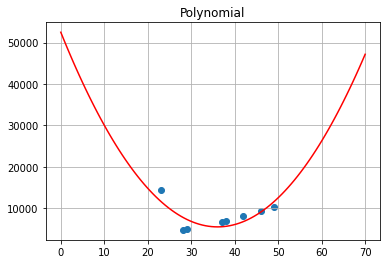

The Pearson Correlation Coefficient is 0.002307313755037053  with a P-value of P = 0.9956738020635797
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,3,0,0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
408    38    0  21.12         3  ...       1          3           1               0
1109   45    0  20.35         3  ...       1          0           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


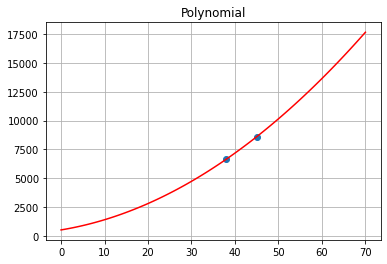

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
169    27    0  18.905         3  ...       1          1           1               0
182    22    0  19.950         3  ...       1          1           1               0
586    21    0  20.235         3  ...       1          1           1               0
788    29    0  22.515         3  ...       1          3           1               0
874    44    0  21.850         3  ...       1          0           1               0
963    46    0  24.795         3  ...       1          0           1               0
1238   37    0  22.705         3  ...       1          3           1               0

[7 rows x 11 columns]


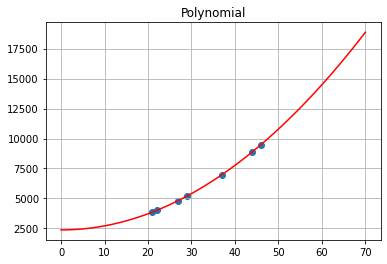

The Pearson Correlation Coefficient is 0.9957054963267324  with a P-value of P = 2.3159885288399393e-06
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,3,0,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
869    25    1  24.3         3  ...       1          1           1               0
1035   54    1  23.0         3  ...       1          2           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


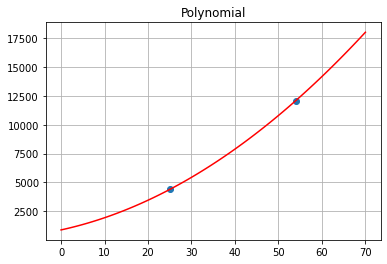

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,3,1,1
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
613    34    1  19.000         3  ...       1          3           1               0
647    40    1  23.370         3  ...       1          0           1               0
756    39    1  22.800         3  ...       1          3           1               0
995    39    1  23.275         3  ...       1          3           1               0
1155   36    1  22.135         3  ...       1          3           1               0

[5 rows x 11 columns]


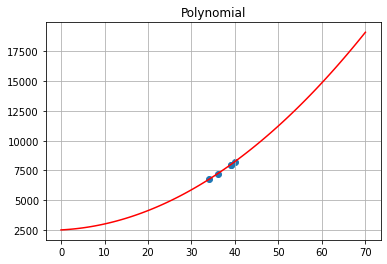

The Pearson Correlation Coefficient is 0.999847387196578  with a P-value of P = 2.2631345282210594e-06
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
486    54    1  21.470         3  ...       1          2           1               0
1119   30    1  19.950         3  ...       1          3           1               0
1232   54    1  24.605         3  ...       1          2           1               0
1242   22    1  21.280         3  ...       1          1           1               0

[4 rows x 11 columns]


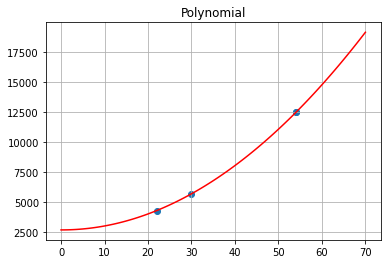

The Pearson Correlation Coefficient is 0.9976836332118333  with a P-value of P = 0.0023163667881667127
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,4,0,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,4,0,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,4,0,2
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
258   51    0  24.415         4  ...       1          0           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


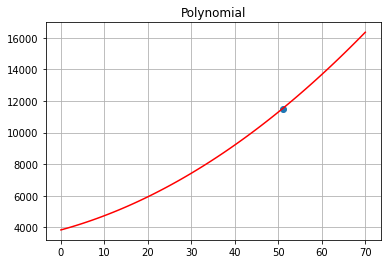

THIS DATAFRAME IS EMPTY:1,0,4,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,4,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,4,1,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,4,1,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)



THIS DATAFRAME IS EMPTY:1,0,4,1,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
413    25    0  23.9         5  ...       1          1           1               0
1245   28    0  24.3         5  ...       1          3           1               0

[2 rows x 11 columns]


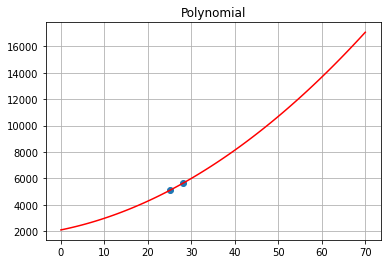

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
425   45    0  24.31         5  ...       1          0           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


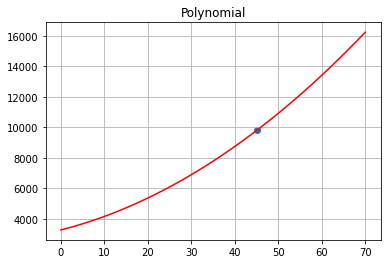

THIS DATAFRAME IS EMPTY:1,0,5,0,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,5,0,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,5,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,5,1,0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1130   39    1  23.87         5  ...       1          3           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


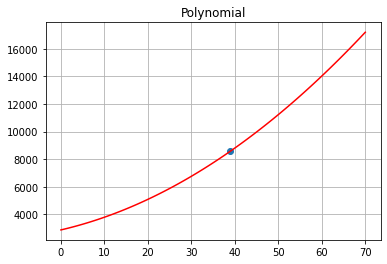

THIS DATAFRAME IS EMPTY:1,0,5,1,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,0,5,1,2
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
937   39    1  24.225         5  ...       1          3           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


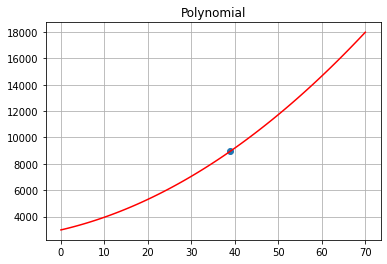

THIS DATAFRAME IS EMPTY:1,0,5,1,3
    age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
99   38    0  19.3         0  ...       1          3           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


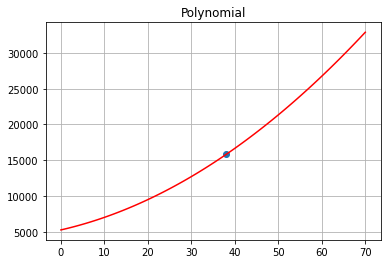

THIS DATAFRAME IS EMPTY:1,1,0,0,0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
156    48    0  24.42         0  ...       1          0           0               0
224    42    0  24.64         0  ...       1          0           0               0
793    53    0  20.90         0  ...       1          2           0               0
1265   64    0  23.76         0  ...       1          2           0               0

[4 rows x 11 columns]


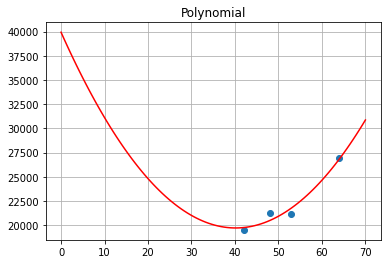

The Pearson Correlation Coefficient is 0.9541067617137269  with a P-value of P = 0.04589323828627312
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
98     56    0  19.950         0  ...       1          2           0               0
799    33    0  24.795         0  ...       1          3           0               0
917    45    0  22.895         0  ...       1          0           0               0
975    29    0  22.895         0  ...       1          3           0               0
1033   18    0  21.565         0  ...       1          1           0               0

[5 rows x 11 columns]


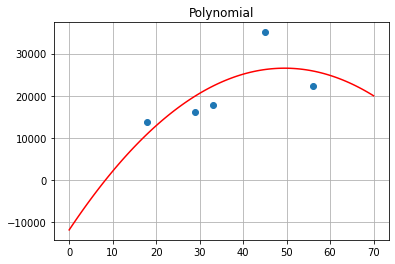

The Pearson Correlation Coefficient is 0.6619594708200336  with a P-value of P = 0.2235818085878864
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
857   25    0  24.13         0  ...       1          1           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


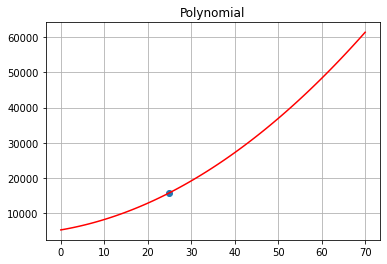

THIS DATAFRAME IS EMPTY:1,1,0,0,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
362    19    1  21.7         0  ...       1          1           2               0
909    32    1  24.6         0  ...       1          3           2               0
1231   20    1  21.8         0  ...       1          1           2               0

[3 rows x 11 columns]


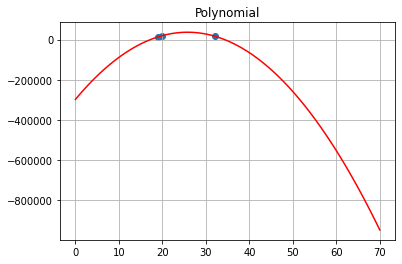

The Pearson Correlation Coefficient is 0.15782661373356596  with a P-value of P = 0.8991025826768234
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
70     27    1  24.75         0  ...       1          1           2               0
664    64    1  22.99         0  ...       1          2           2               0
1223   20    1  24.42         0  ...       1          1           2               0

[3 rows x 11 columns]


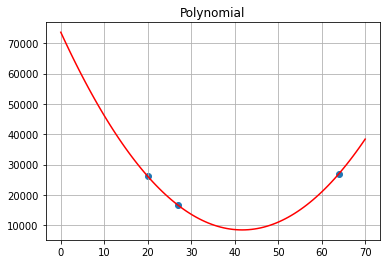

The Pearson Correlation Coefficient is 0.4384069663580917  with a P-value of P = 0.7110857397063961
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
153    42    1  23.37         0  ...       1          0           2               0
989    24    1  20.52         0  ...       1          1           2               0
1282   18    1  21.66         0  ...       1          1           2               0
1306   29    1  21.85         0  ...       1          3           2               0

[4 rows x 11 columns]


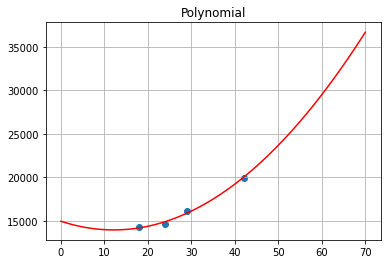

The Pearson Correlation Coefficient is 0.9774589987269955  with a P-value of P = 0.022541001273004513
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
64    20    1  22.420         0  ...       1          1           2               0
607   59    1  23.655         0  ...       1          2           2               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


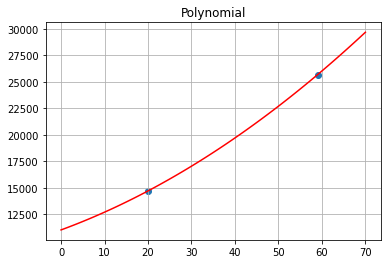

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,1,0,0
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
266   40    0  19.80         1  ...       1          0           0               0
502   51    0  23.21         1  ...       1          0           0               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


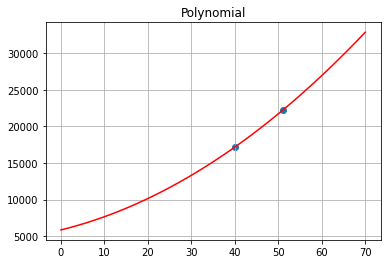

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,1,0,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,1,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,1,1,0
    age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
58   53    1  22.88         1  ...       1          2           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


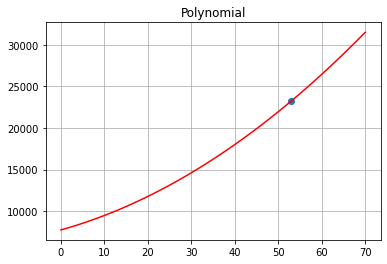

THIS DATAFRAME IS EMPTY:1,1,1,1,1
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
411   44    1  20.235         1  ...       1          0           2               0
593   21    1  21.850         1  ...       1          1           2               0
727   29    1  21.755         1  ...       1          3           2               0

[3 rows x 11 columns]


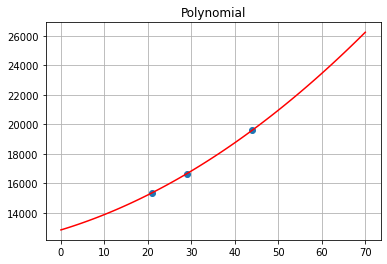

The Pearson Correlation Coefficient is 0.9989518939993108  with a P-value of P = 0.029149805683237034
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1030   46    1  23.655         1  ...       1          0           2               0
1176   52    1  24.130         1  ...       1          2           2               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


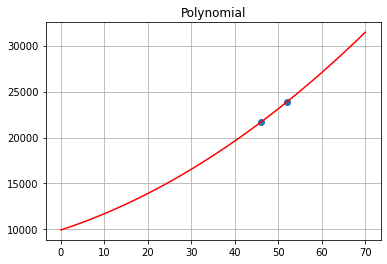

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,2,0,0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1011   43    0  20.13         2  ...       1          0           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


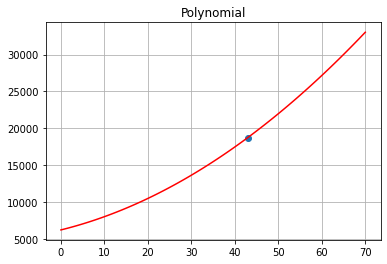

THIS DATAFRAME IS EMPTY:1,1,2,0,1
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1304   42    0  24.605         2  ...       1          0           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


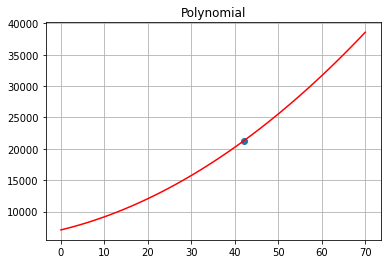

THIS DATAFRAME IS EMPTY:1,1,2,0,2
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
85     45    0  22.895         2  ...       1          0           0               0
966    51    0  24.795         2  ...       1          0           0               0
1000   30    0  22.990         2  ...       1          3           0               0

[3 rows x 11 columns]


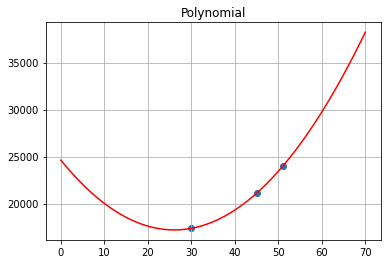

The Pearson Correlation Coefficient is 0.986113340487338  with a P-value of P = 0.1062179398399385
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
417   36    1  22.6         2  ...       1          3           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


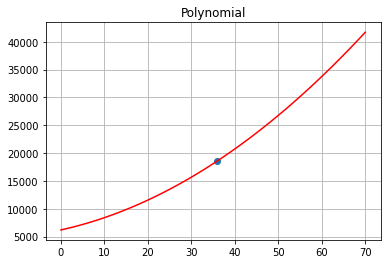

THIS DATAFRAME IS EMPTY:1,1,2,1,0
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
235   40    1  22.22         2  ...       1          0           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


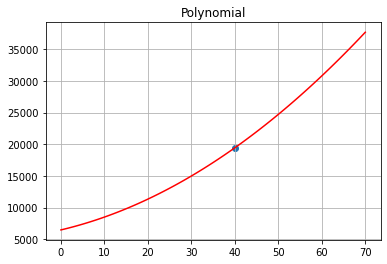

THIS DATAFRAME IS EMPTY:1,1,2,1,1
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
896    43    1  20.045         2  ...       1          0           2               0
1100   33    1  19.095         2  ...       1          3           2               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


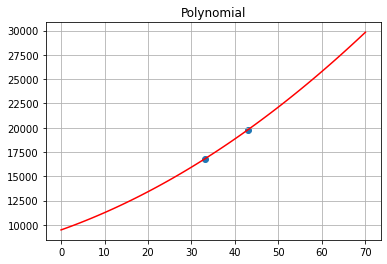

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1045   43    1  24.7         2  ...       1          0           2               0

[1 rows x 11 columns]


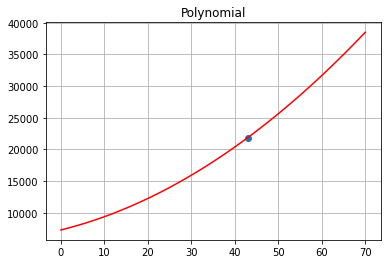

THIS DATAFRAME IS EMPTY:1,1,2,1,3
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
780   30    0  24.4         3  ...       1          3           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


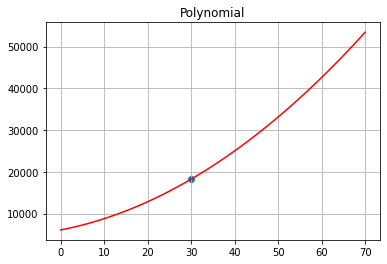

THIS DATAFRAME IS EMPTY:1,1,3,0,0


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
69    28    0  23.98         3  ...       1          3           0               0
730   35    0  24.42         3  ...       1          3           0               0

[2 rows x 11 columns]


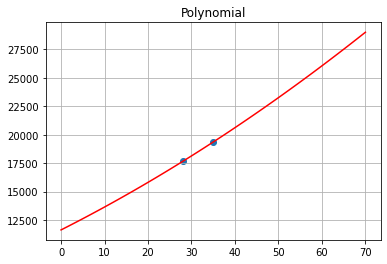

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
262   52    0  24.32         3  ...       1          2           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


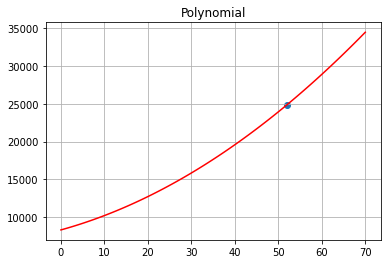

THIS DATAFRAME IS EMPTY:1,1,3,0,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,3,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,3,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,3,1,1
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
301   53    1  22.610         3  ...       1          2           2               0
376   39    1  24.890         3  ...       1          3           2               0
854   49    1  23.845         3  ...       1          0           2               0

[3 rows x 11 columns]


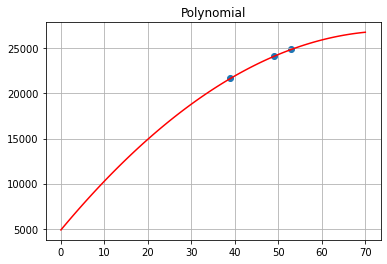

The Pearson Correlation Coefficient is 0.9987168581812039  with a P-value of P = 0.032253652296187645
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
994    27    1  20.045         3  ...       1          1           2               0
1314   30    1  23.655         3  ...       1          3           2               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


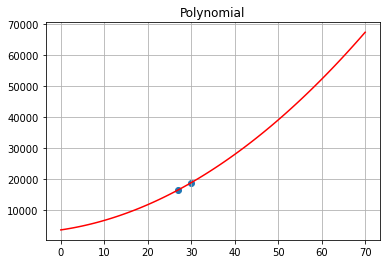

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,4,0,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,4,0,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,4,0,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,4,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:1,1,4,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, 

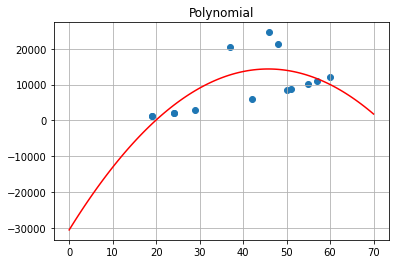

The Pearson Correlation Coefficient is 0.5877972080093519  with a P-value of P = 0.027063049602856843
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
108    29    0  27.94         0  ...       2          3           3               0
151    48    0  29.70         0  ...       2          0           3               0
192    25    0  25.74         0  ...       2          1           3               0
206    59    0  26.40         0  ...       2          2           3               0
336    60    0  25.74         0  ...       2          2           3               0
576    22    0  26.84         0  ...       2          1           3               0
672    36    0  29.70         0  ...       2          3           3               0
804    23    0  26.51         0  ...       2          1           3               0
939    53    0  29.48         0  ...       2          2           3               0
1216   40    0  25.08         0  ...       2          0   

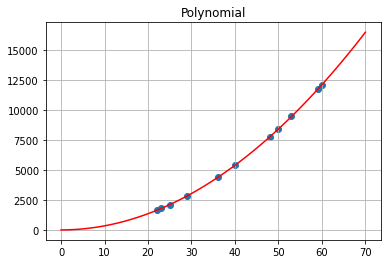

The Pearson Correlation Coefficient is 0.9928925038967052  with a P-value of P = 1.246561790176218e-09
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
10     25    0  26.220         0  ...       2          1           3               0
101    30    0  25.460         0  ...       2          3           3               0
115    60    0  28.595         0  ...       2          2           3               0
439    26    0  29.450         0  ...       2          1           3               0
446    60    0  29.640         0  ...       2          2           3               0
463    56    0  25.935         0  ...       2          2           3               0
495    20    0  27.930         0  ...       2          1           3               0
501    43    0  26.030         0  ...       2          0           3               0
529    18    0  25.460         0  ...       2          1           3               0
648    18    0  28.500         0  ...       2  

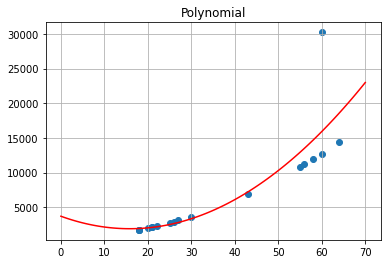

The Pearson Correlation Coefficient is 0.8412213012443386  with a P-value of P = 1.2186224041111296e-05
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
4      32    0  28.880         0  ...       2          3           3               0
33     63    0  28.310         0  ...       2          2           3               0
133    19    0  25.555         0  ...       2          1           3               0
137    22    0  25.175         0  ...       2          1           3               0
164    37    0  29.640         0  ...       2          3           3               0
180    58    0  28.595         0  ...       2          2           3               0
274    25    0  27.550         0  ...       2          1           3               0
349    19    0  27.835         0  ...       2          1           3               0
453    20    0  29.735         0  ...       2          1           3               0
464    19    0  25.175         0  ...       2 

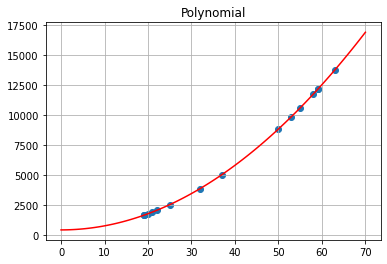

The Pearson Correlation Coefficient is 0.9943259775660201  with a P-value of P = 5.0014822536303045e-15
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
65     19    1  28.9         0  ...       2          1           3               0
87     56    1  27.2         0  ...       2          2           3               0
191    36    1  26.2         0  ...       2          3           3               0
260    58    1  25.2         0  ...       2          2           3               0
340    24    1  27.6         0  ...       2          1           3               0
351    50    1  25.6         0  ...       2          0           3               0
352    30    1  27.7         0  ...       2          3           3               0
448    40    1  29.6         0  ...       2          0           3               0
472    19    1  29.8         0  ...       2          1           3               0
509    57    1  28.7         0  ...       2          2           3

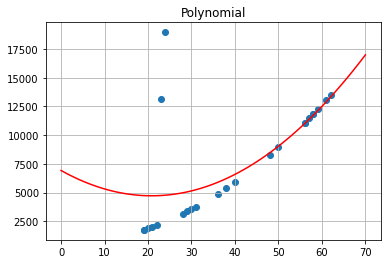

The Pearson Correlation Coefficient is 0.6353854718240979  with a P-value of P = 0.0008492587132913186
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
5      31    1  25.74         0  ...       2          3           3               0
118    49    1  27.17         0  ...       2          0           3               0
135    22    1  28.05         0  ...       2          1           3               0
236    18    1  26.73         0  ...       2          1           3               0
293    22    1  28.82         0  ...       2          1           3               0
491    61    1  25.08         0  ...       2          2           3               0
551    32    1  28.93         0  ...       2          3           3               0
743    31    1  26.62         0  ...       2          3           3               0
789    62    1  29.92         0  ...       2          2           3               0
979    36    1  29.92         0  ...       2          3  

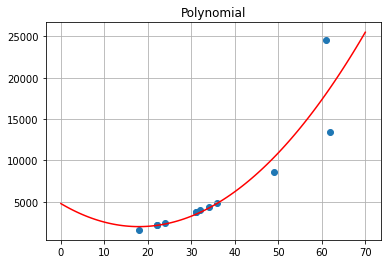

The Pearson Correlation Coefficient is 0.8896845030918965  with a P-value of P = 0.00010662638959963554
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
31     18    1  26.315         0  ...       2          1           3               0
40     24    1  26.600         0  ...       2          1           3               0
125    26    1  28.785         0  ...       2          1           3               0
130    59    1  26.505         0  ...       2          2           3               0
134    20    1  28.785         0  ...       2          1           3               0
333    56    1  28.785         0  ...       2          2           3               0
342    60    1  27.550         0  ...       2          2           3               0
427    18    1  29.165         0  ...       2          1           3               0
492    18    1  25.080         0  ...       2          1           3               0
508    24    1  25.270         0  ...       2 

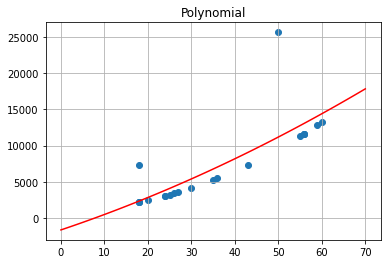

The Pearson Correlation Coefficient is 0.7849259295132875  with a P-value of P = 2.5112054970883015e-05
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
9      60    1  25.840         0  ...       2          2           3               0
88     46    1  27.740         0  ...       2          0           3               0
89     55    1  26.980         0  ...       2          2           3               0
122    20    1  28.975         0  ...       2          1           3               0
183    44    1  26.410         0  ...       2          0           3               0
216    53    1  26.600         0  ...       2          2           3               0
287    63    1  26.220         0  ...       2          2           3               0
318    44    1  27.645         0  ...       2          0           3               0
447    56    1  25.650         0  ...       2          2           3               0
575    58    1  27.170         0  ...       2 

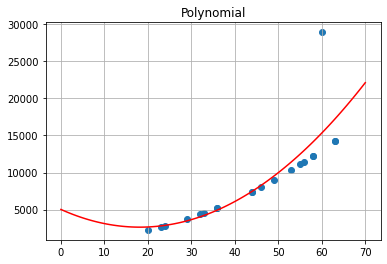

The Pearson Correlation Coefficient is 0.812696483014198  with a P-value of P = 1.3353772884714118e-05
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
149   19    0  28.4         1  ...       2          1           1               0
177   54    0  29.2         1  ...       2          2           1               0
233   59    0  27.5         1  ...       2          2           1               0
666   49    0  28.7         1  ...       2          0           1               0
878   41    0  28.8         1  ...       2          0           1               0
965   35    0  27.1         1  ...       2          3           1               0

[6 rows x 11 columns]


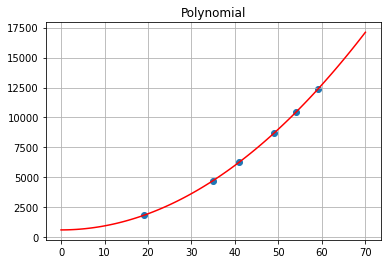

The Pearson Correlation Coefficient is 0.987588543203636  with a P-value of P = 0.00023011043287434835
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
270    18    0  29.37         1  ...       2          1           1               0
285    46    0  26.62         1  ...       2          0           1               0
977    26    0  29.15         1  ...       2          1           1               0
993    38    0  28.27         1  ...       2          3           1               0
1061   57    0  27.94         1  ...       2          2           1               0
1273   35    0  27.61         1  ...       2          3           1               0

[6 rows x 11 columns]


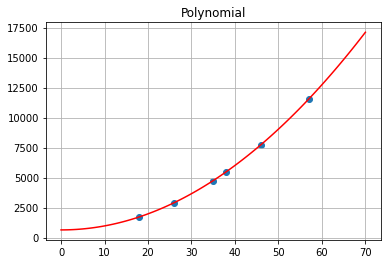

The Pearson Correlation Coefficient is 0.9860095293277549  with a P-value of P = 0.0002922307041622492
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
80     31    0  26.885         1  ...       2          3           1               0
249    29    0  28.975         1  ...       2          3           1               0
269    49    0  25.840         1  ...       2          0           1               0
273    50    0  27.455         1  ...       2          0           1               0
282    30    0  27.645         1  ...       2          3           1               0
291    29    0  29.640         1  ...       2          3           1               0
535    38    0  28.025         1  ...       2          3           1               0
580    59    0  25.460         1  ...       2          2           1               0
809    25    0  25.840         1  ...       2          1           1               0
980    54    0  25.460         1  ...       2  

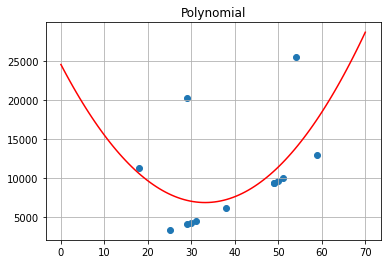

The Pearson Correlation Coefficient is 0.38246664681729425  with a P-value of P = 0.1971293352103737
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
67     40    0  26.315         1  ...       2          0           1               0
320    34    0  25.270         1  ...       2          3           1               0
337    62    0  27.550         1  ...       2          2           1               0
434    31    0  28.595         1  ...       2          3           1               0
646    39    0  26.220         1  ...       2          3           1               0
726    41    0  28.405         1  ...       2          0           1               0
881    23    0  27.360         1  ...       2          1           1               0
897    19    0  25.555         1  ...       2          1           1               0
910    22    0  28.310         1  ...       2          1           1               0
957    24    0  26.790         1  ...       2    

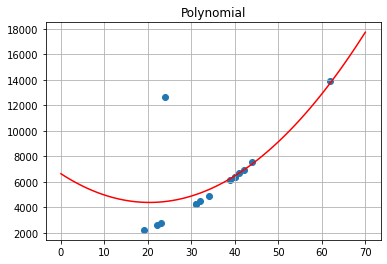

The Pearson Correlation Coefficient is 0.6476530280828304  with a P-value of P = 0.00903961715094774
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
104    34    1  27.5         1  ...       2          3           1               0
106    19    1  28.4         1  ...       2          1           1               0
242    55    1  26.8         1  ...       2          2           1               0
363    21    1  26.4         1  ...       2          1           1               0
466    60    1  28.7         1  ...       2          2           1               0
527    51    1  25.8         1  ...       2          0           1               0
767    42    1  29.0         1  ...       2          0           1               0
876    49    1  27.1         1  ...       2          0           1               0
913    44    1  27.5         1  ...       2          0           1               0
985    44    1  25.8         1  ...       2          0           1   

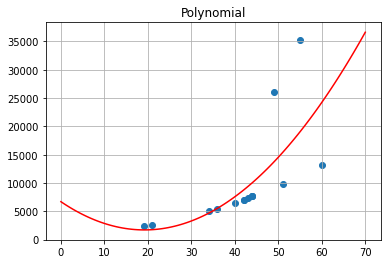

The Pearson Correlation Coefficient is 0.6417173065357336  with a P-value of P = 0.009912457979613015
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
76     29    1  29.59         1  ...       2          3           1               0
213    34    1  26.73         1  ...       2          3           1               0
218    26    1  29.92         1  ...       2          1           1               0
339    46    1  27.72         1  ...       2          0           1               0
348    36    1  29.92         1  ...       2          3           1               0
504    38    1  28.93         1  ...       2          3           1               0
538    46    1  28.05         1  ...       2          0           1               0
585    33    1  28.27         1  ...       2          3           1               0
610    47    1  29.37         1  ...       2          0           1               0
669    40    1  29.81         1  ...       2          0   

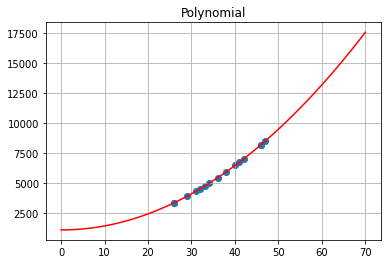

The Pearson Correlation Coefficient is 0.9965366428021014  with a P-value of P = 1.9790865594466174e-15
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
154    40    1  25.460         1  ...       2          0           1               0
205    28    1  28.880         1  ...       2          3           1               0
426    38    1  27.265         1  ...       2          3           1               0
724    50    1  27.075         1  ...       2          0           1               0
733    48    1  27.265         1  ...       2          0           1               0
1183   48    1  27.360         1  ...       2          0           1               0

[6 rows x 11 columns]


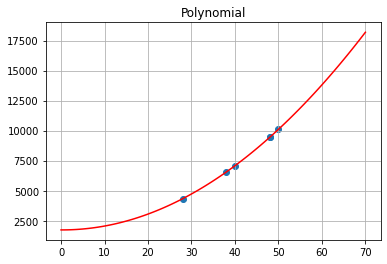

The Pearson Correlation Coefficient is 0.9965864374851618  with a P-value of P = 1.745872545070439e-05
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
63     28    1  25.935         1  ...       2          3           1               0
193    56    1  26.600         1  ...       2          2           1               0
299    48    1  28.880         1  ...       2          0           1               0
703    34    1  26.410         1  ...       2          3           1               0
704    47    1  29.545         1  ...       2          0           1               0
952    30    1  28.405         1  ...       2          3           1               0
987    45    1  27.645         1  ...       2          0           1               0
1164   41    1  28.310         1  ...       2          0           1               0
1257   54    1  27.645         1  ...       2          2           1               0
1299   19    1  25.745         1  ...       2  

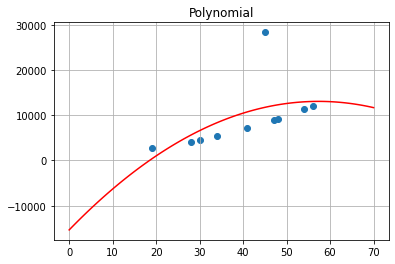

The Pearson Correlation Coefficient is 0.5424008561720034  with a P-value of P = 0.1052644488368849
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
74    44    0  27.4         2  ...       2          0           1               0
398   64    0  25.6         2  ...       2          2           1               0
497   45    0  28.7         2  ...       2          0           1               0
746   34    0  27.0         2  ...       2          3           1               0
865   40    0  29.9         2  ...       2          0           1               0

[5 rows x 11 columns]


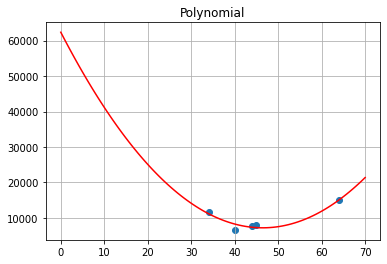

The Pearson Correlation Coefficient is 0.608582341767447  with a P-value of P = 0.27605051035830785
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
532   59    0  29.70         2  ...       2          2           1               0
938   18    0  26.18         2  ...       2          1           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


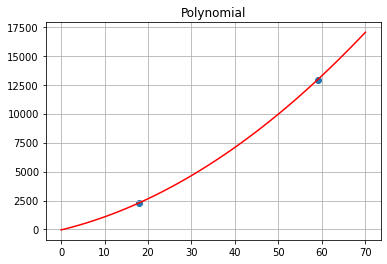

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
8      37    0  29.830         2  ...       2          3           1               0
229    47    0  25.460         2  ...       2          0           1               0
608    28    0  26.980         2  ...       2          3           1               0
685    53    0  26.410         2  ...       2          2           1               0
686    42    0  26.125         2  ...       2          0           1               0
755    31    0  27.645         2  ...       2          3           1               0
936    44    0  29.735         2  ...       2          0           1               0
968    21    0  25.745         2  ...       2          1           1               0
1006   28    0  29.260         2  ...       2          3           1               0

[9 rows x 11 columns]


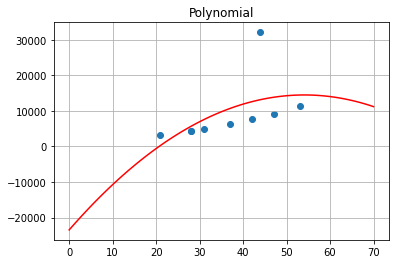

The Pearson Correlation Coefficient is 0.5222567913776264  with a P-value of P = 0.14920216375466724
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
24     37    0  28.025         2  ...       2          3           1               0
143    29    0  29.735         2  ...       2          3           1               0
176    38    0  27.835         2  ...       2          3           1               0
212    24    0  28.500         2  ...       2          1           1               0
387    50    0  25.365         2  ...       2          0           1               0
1039   19    0  27.265         2  ...       2          1           1               0
1173   38    0  29.260         2  ...       2          3           1               0
1298   33    0  27.455         2  ...       2          3           1               0

[8 rows x 11 columns]


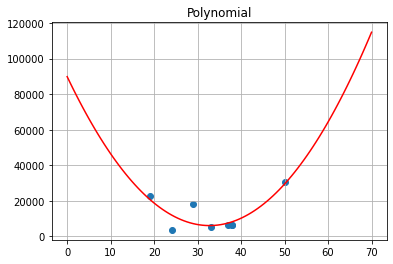

The Pearson Correlation Coefficient is 0.2023265961238588  with a P-value of P = 0.6308635531359934
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
111    55    1  29.7         2  ...       2          2           1               0
163    32    1  29.8         2  ...       2          3           1               0
178    46    1  28.9         2  ...       2          0           1               0
306    28    1  27.5         2  ...       2          3           1               0
771    53    1  26.7         2  ...       2          2           1               0
879    37    1  29.5         2  ...       2          3           1               0
1199   31    1  25.8         2  ...       2          3           1               0

[7 rows x 11 columns]


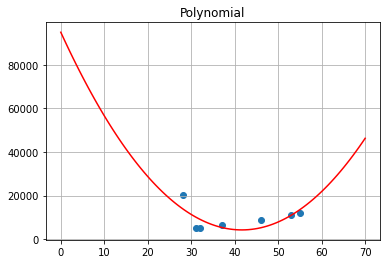

The Pearson Correlation Coefficient is 0.027886278732131595  with a P-value of P = 0.9526771880558461
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
186    26    1  29.92         2  ...       2          1           1               0
197    45    1  28.60         2  ...       2          0           1               0
596    42    1  29.48         2  ...       2          0           1               0
823    44    1  29.81         2  ...       2          0           1               0
1234   45    1  27.83         2  ...       2          0           1               0
1297   28    1  26.51         2  ...       2          3           1               0
1330   57    1  25.74         2  ...       2          2           1               0

[7 rows x 11 columns]


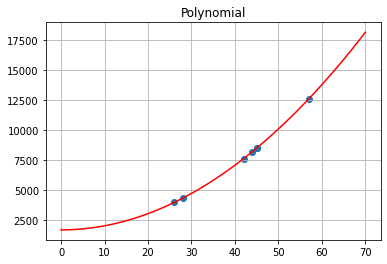

The Pearson Correlation Coefficient is 0.9917774975828725  with a P-value of P = 1.1723253247594998e-05
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
275    47    1  26.600         2  ...       2          0           1               0
764    45    1  25.175         2  ...       2          0           1               0
905    26    1  29.355         2  ...       2          1           1               0
991    38    1  27.835         2  ...       2          3           1               0
1073   54    1  28.880         2  ...       2          2           1               0

[5 rows x 11 columns]


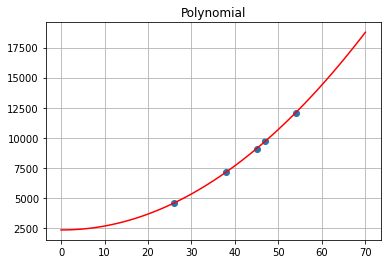

The Pearson Correlation Coefficient is 0.9937117505082942  with a P-value of P = 0.0005980237574336203
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1107   50    1  26.220         2  ...       2          0           1               0
1279   25    1  26.790         2  ...       2          1           1               0
1319   39    1  26.315         2  ...       2          3           1               0

[3 rows x 11 columns]


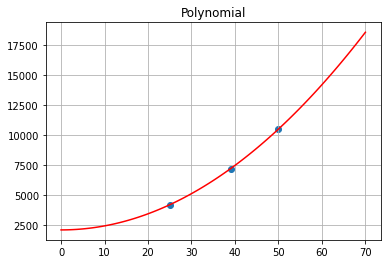

The Pearson Correlation Coefficient is 0.9955122241024351  with a P-value of P = 0.0603355468787034
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
294    25    0  26.8         3  ...       2          1           1               0
437    35    0  28.9         3  ...       2          3           1               0
1101   53    0  28.6         3  ...       2          2           1               0
1269   45    0  27.5         3  ...       2          0           1               0

[4 rows x 11 columns]


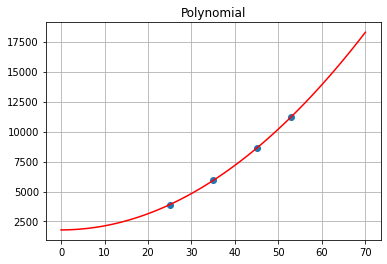

The Pearson Correlation Coefficient is 0.994642172745593  with a P-value of P = 0.005357827254407033
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
289   52    0  26.4         3  ...       2          2           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


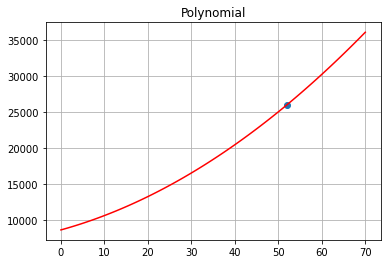

THIS DATAFRAME IS EMPTY:2,0,3,0,1
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
60    43    0  27.360         3  ...       2          0           1               0
300   36    0  27.550         3  ...       2          3           1               0
626   36    0  28.880         3  ...       2          3           1               0
902   26    0  27.265         3  ...       2          1           1               0

[4 rows x 11 columns]


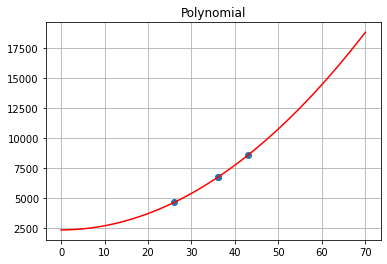

The Pearson Correlation Coefficient is 0.9965301791941812  with a P-value of P = 0.003469820805818813
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
357    47    0  29.830         3  ...       2          0           1               0
707    49    0  28.690         3  ...       2          0           1               0
1063   36    0  28.595         3  ...       2          3           1               0
1293   46    0  25.745         3  ...       2          0           1               0

[4 rows x 11 columns]


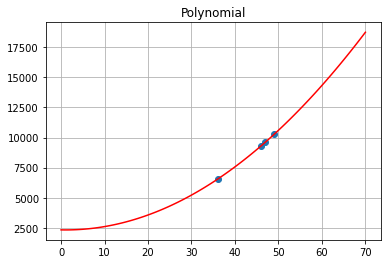

The Pearson Correlation Coefficient is 0.9995500880120661  with a P-value of P = 0.0004499119879338709
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
72     53    1  28.1         3  ...       2          2           1               0
785    35    1  27.7         3  ...       2          3           1               0
861    38    1  28.0         3  ...       2          3           1               0
1246   45    1  25.7         3  ...       2          0           1               0

[4 rows x 11 columns]


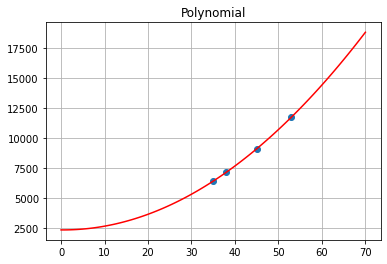

The Pearson Correlation Coefficient is 0.9984682008609899  with a P-value of P = 0.001531799139010137
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
25    59    1  27.72         3  ...       2          2           1               0
159   50    1  27.83         3  ...       2          0           1               0
231   59    1  27.83         3  ...       2          2           1               0
345   34    1  29.26         3  ...       2          3           1               0
970   50    1  28.16         3  ...       2          0           1               0

[5 rows x 11 columns]


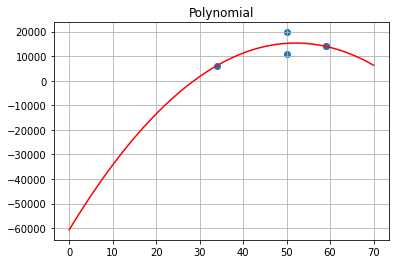

The Pearson Correlation Coefficient is 0.6251404675460679  with a P-value of P = 0.2594575943388286
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
255   55    1  25.365         3  ...       2          2           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


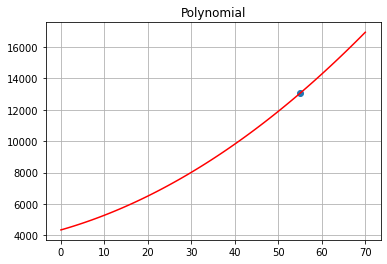

THIS DATAFRAME IS EMPTY:2,0,3,1,2
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
7      37    1  27.740         3  ...       2          3           1               0
54     40    1  28.690         3  ...       2          0           1               0
912    59    1  26.695         3  ...       2          2           1               0
1113   28    1  26.315         3  ...       2          3           1               0
1135   50    1  28.120         3  ...       2          0           1               0
1195   19    1  27.930         3  ...       2          1           1               0

[6 rows x 11 columns]


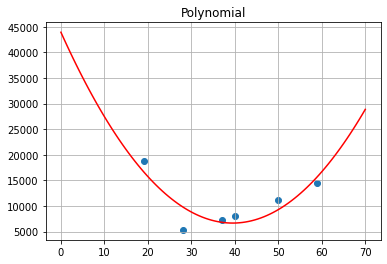

The Pearson Correlation Coefficient is -0.05826298415740808  with a P-value of P = 0.9127044128080184
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
450    39    0  29.6         4  ...       2          3           1               0
1247   33    0  29.4         4  ...       2          3           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


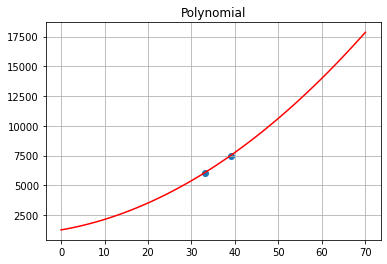

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,0,4,0,1
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
165   47    0  28.215         4  ...       2          0           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


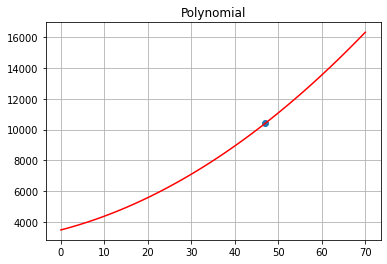

THIS DATAFRAME IS EMPTY:2,0,4,0,2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
884   25    0  26.695         4  ...       2          1           1               0

[1 rows x 11 columns]


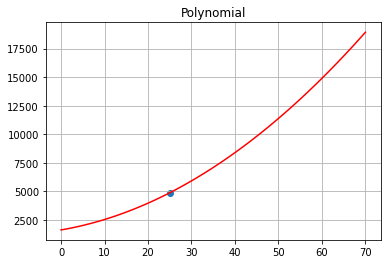

THIS DATAFRAME IS EMPTY:2,0,4,0,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1064   29    1  25.6         4  ...       2          3           1               0
1253   40    1  29.3         4  ...       2          0           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


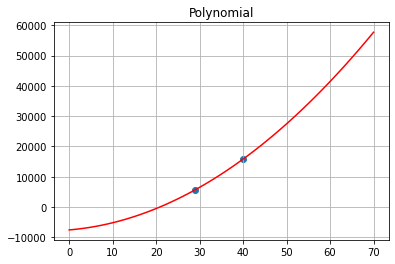

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
891   36    1  29.04         4  ...       2          3           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


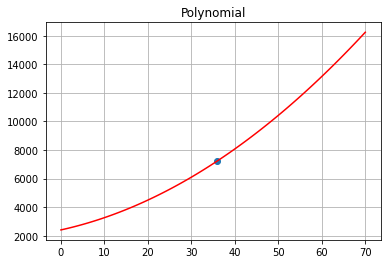

THIS DATAFRAME IS EMPTY:2,0,4,1,1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
321   26    1  29.640         4  ...       2          1           1               0
659   57    1  28.785         4  ...       2          2           1               0

[2 rows x 11 columns]


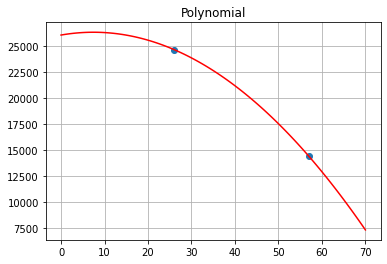

The Pearson Correlation Coefficient is -1.0  with a P-value of P = 1.0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1154   48    1  27.93         4  ...       2          0           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


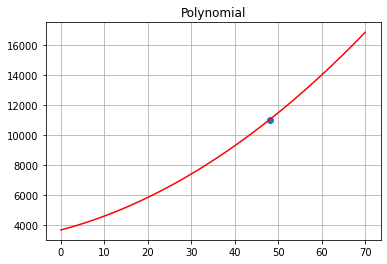

THIS DATAFRAME IS EMPTY:2,0,4,1,3

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)



     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
932   46    0  25.8         5  ...       2          0           1               0

[1 rows x 11 columns]


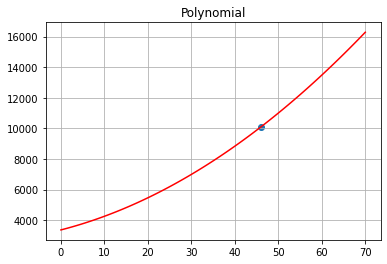

THIS DATAFRAME IS EMPTY:2,0,5,0,0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1272   43    0  25.52         5  ...       2          0           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


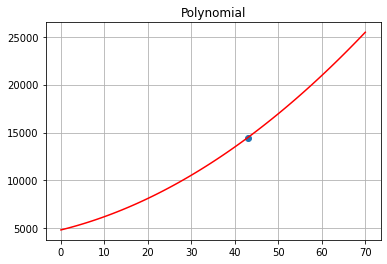

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


THIS DATAFRAME IS EMPTY:2,0,5,0,1
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
71     31    0  28.50         5  ...       2          3           1               0
1116   41    0  29.64         5  ...       2          0           1               0

[2 rows x 11 columns]


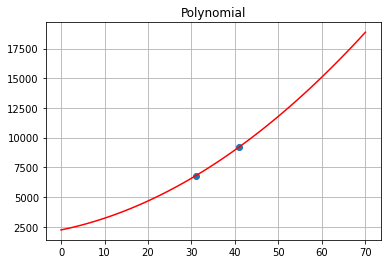

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,0,5,0,3
    age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
32   19    1  28.6         5  ...       2          1           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


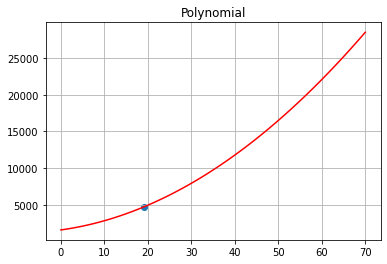

THIS DATAFRAME IS EMPTY:2,0,5,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,0,5,1,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,0,5,1,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,0,5,1,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
296    19    0  27.7         0  ...       2          1           0               0
1252   20    0  27.3         0  ...       2          1           0               0
1303   43    0  27.8         0  ...       2          0           0               0

[3 rows x 11 columns]


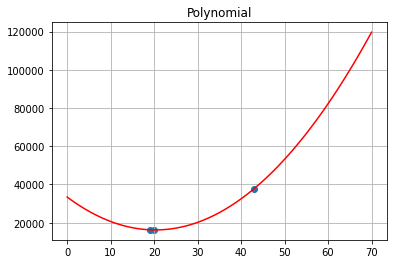

The Pearson Correlation Coefficient is 0.9992221141358851  with a P-value of P = 0.025111995055859763
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
741    27    0  29.15         0  ...       2          1           0               0
1179   31    0  29.81         0  ...       2          3           0               0
1274   26    0  27.06         0  ...       2          1           0               0

[3 rows x 11 columns]


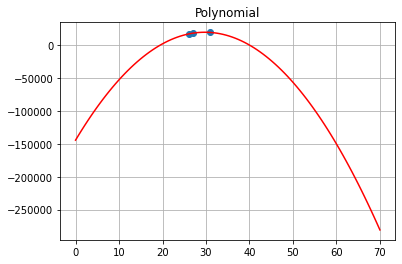

The Pearson Correlation Coefficient is 0.9364895072461713  with a P-value of P = 0.22810963247206636
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
157    18    0  25.175         0  ...       2          1           0               0
476    24    0  28.500         0  ...       2          1           0               0
638    39    0  26.410         0  ...       2          3           0               0
886    57    0  28.975         0  ...       2          2           0               0
1250   24    0  29.830         0  ...       2          1           0               0
1321   62    0  26.695         0  ...       2          2           0               0

[6 rows x 11 columns]


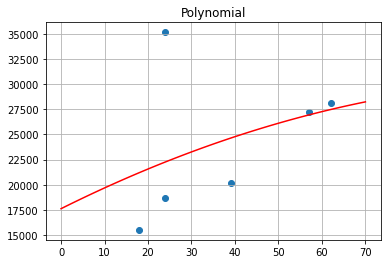

The Pearson Correlation Coefficient is 0.36055753299149135  with a P-value of P = 0.4826002528682012
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
238   19    0  29.07         0  ...       2          1           0               0
331   52    0  27.36         0  ...       2          2           0               0
795   27    0  28.50         0  ...       2          1           0               0

[3 rows x 11 columns]


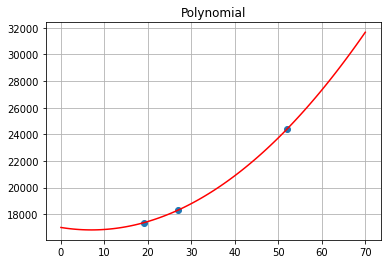

The Pearson Correlation Coefficient is 0.9940944160559567  with a P-value of P = 0.06922142035540696
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
0     19    1  27.9         0  ...       2          1           2               0
126   19    1  28.3         0  ...       2          1           2               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


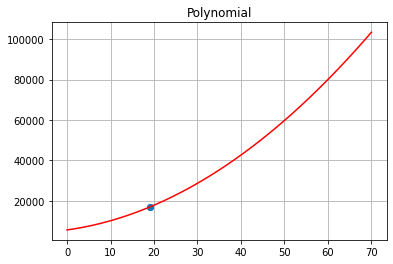

The Pearson Correlation Coefficient is nan  with a P-value of P = nan
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
11    62    1  26.29         0  ...       2          2           2               0
750   37    1  26.40         0  ...       2          3           2               0
757   47    1  27.83         0  ...       2          0           2               0
843   57    1  29.81         0  ...       2          2           2               0

[4 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


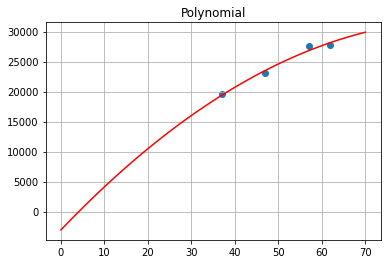

The Pearson Correlation Coefficient is 0.9876791634024733  with a P-value of P = 0.012320836597526696
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
244   63    1  27.74         0  ...       2          2           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


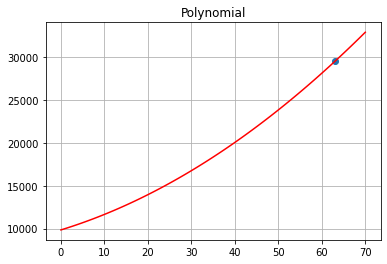

THIS DATAFRAME IS EMPTY:2,1,0,1,2
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
160    42    1  26.600         0  ...       2          0           2               0
375    23    1  28.310         0  ...       2          1           2               0
419    63    1  26.980         0  ...       2          2           2               0
604    19    1  28.310         0  ...       2          1           2               0
773    19    1  28.880         0  ...       2          1           2               0
890    64    1  26.885         0  ...       2          2           2               0
916    43    1  26.885         0  ...       2          0           2               0
1040   35    1  28.025         0  ...       2          3           2               0
1337   61    1  29.070         0  ...       2          2           2               0

[9 rows x 11 columns]


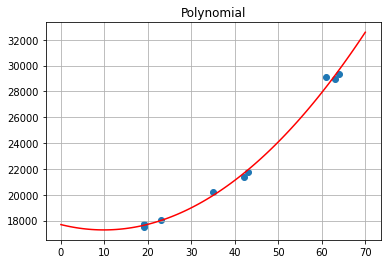

The Pearson Correlation Coefficient is 0.9796035424429557  with a P-value of P = 3.911425059257903e-06
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
52    48    0  28.0         1  ...       2          0           0               0
514   39    0  28.3         1  ...       2          3           0               0
762   33    0  27.1         1  ...       2          3           0               0

[3 rows x 11 columns]


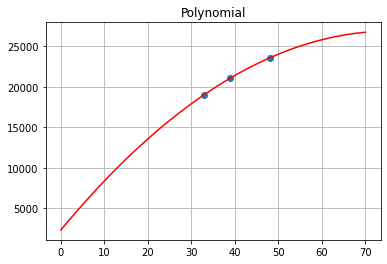

The Pearson Correlation Coefficient is 0.9983012962605693  with a P-value of P = 0.03711209228941335
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
297   47    0  25.41         1  ...       2          0           0               0
524   42    0  26.07         1  ...       2          0           0               0
885   32    0  28.93         1  ...       2          3           0               0

[3 rows x 11 columns]


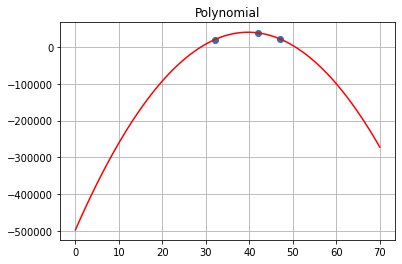

The Pearson Correlation Coefficient is 0.2975366743209506  with a P-value of P = 0.8076698890237293
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
827    36    0  28.025         1  ...       2          3           0               0
1170   18    0  27.360         1  ...       2          1           0               0
1278   39    0  29.925         1  ...       2          3           0               0

[3 rows x 11 columns]


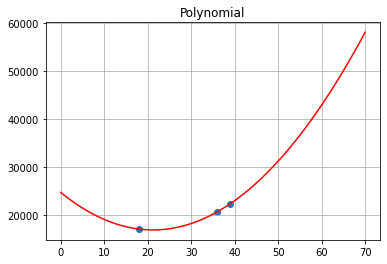

The Pearson Correlation Coefficient is 0.9827994090652702  with a P-value of P = 0.11824731472378468
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
105    20    0  28.025         1  ...       2          1           0               0
444    56    0  26.695         1  ...       2          2           0               0
475    61    0  28.310         1  ...       2          2           0               0
954    34    0  27.835         1  ...       2          3           0               0
1026   19    0  26.030         1  ...       2          1           0               0

[5 rows x 11 columns]


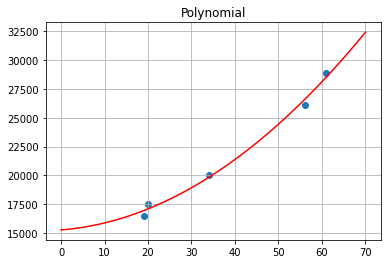

The Pearson Correlation Coefficient is 0.9916948573008992  with a P-value of P = 0.0009074291671155597
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
783   50    1  27.6         1  ...       2          0           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


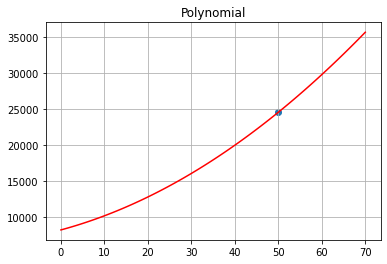

THIS DATAFRAME IS EMPTY:2,1,1,1,0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
117    29    1  27.94         1  ...       2          3           2               0
261    20    1  26.84         1  ...       2          1           2               0
465    30    1  28.38         1  ...       2          3           2               0
1184   23    1  28.49         1  ...       2          1           2               0

[4 rows x 11 columns]


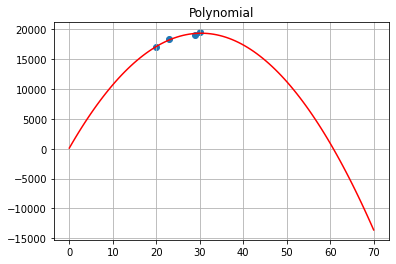

The Pearson Correlation Coefficient is 0.968887295928905  with a P-value of P = 0.03111270407109501
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
280    40    1  28.120         1  ...       2          0           2               0
818    47    1  26.125         1  ...       2          0           2               0
1188   43    1  25.270         1  ...       2          0           2               0
1208   37    1  25.555         1  ...       2          3           2               0

[4 rows x 11 columns]


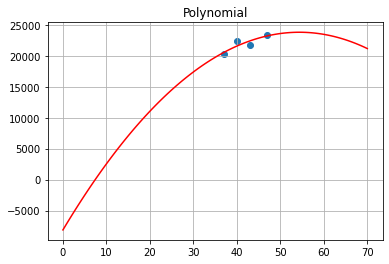

The Pearson Correlation Coefficient is 0.8797892667386921  with a P-value of P = 0.12021073326130793
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,1,1,3
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
617   49    0  25.6         2  ...       2          0           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


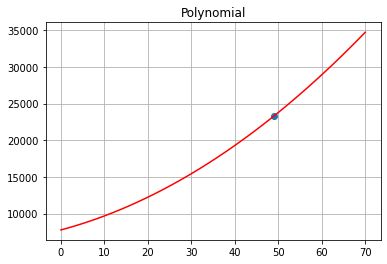

THIS DATAFRAME IS EMPTY:2,1,2,0,0
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
142   34    0  25.3         2  ...       2          3           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


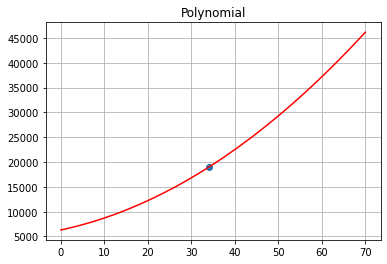

THIS DATAFRAME IS EMPTY:2,1,2,0,1
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
207   35    0  27.74         2  ...       2          3           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


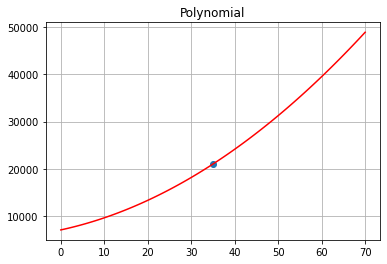

THIS DATAFRAME IS EMPTY:2,1,2,0,2
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
545   49    0  25.84         2  ...       2          0           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


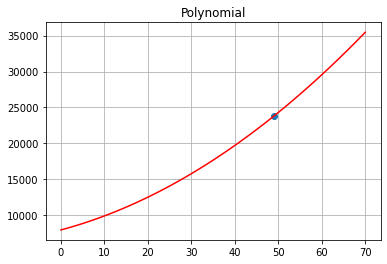

THIS DATAFRAME IS EMPTY:2,1,2,0,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1171   43    1  26.7         2  ...       2          0           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


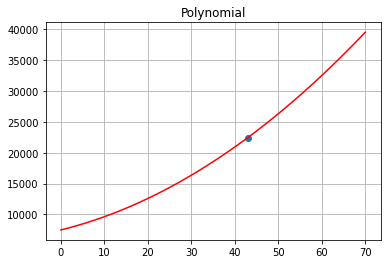

THIS DATAFRAME IS EMPTY:2,1,2,1,0
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
655   52    1  25.3         2  ...       2          2           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


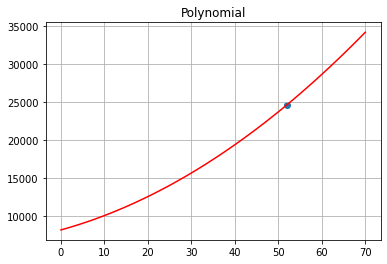

THIS DATAFRAME IS EMPTY:2,1,2,1,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,2,1,2
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1281   47    1  27.645         2  ...       2          0           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


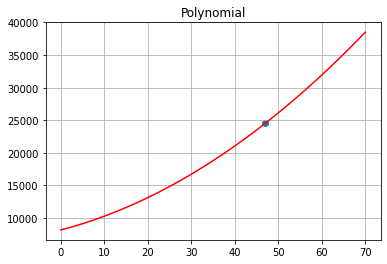

THIS DATAFRAME IS EMPTY:2,1,2,1,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
474    54    0  25.1         3  ...       2          2           0               0
949    25    0  29.7         3  ...       2          1           0               0
982    31    0  25.9         3  ...       2          3           0               0
1053   47    0  29.8         3  ...       2          0           0               0

[4 rows x 11 columns]


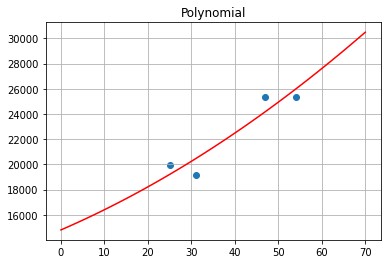

The Pearson Correlation Coefficient is 0.9422984496787571  with a P-value of P = 0.05770155032124291
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,3,0,1
    age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
92   59    0  29.83         3  ...       2          2           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


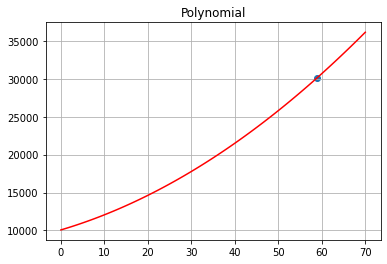

THIS DATAFRAME IS EMPTY:2,1,3,0,2
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
144    30    0  28.690         3  ...       2          3           0               0
641    42    0  28.310         3  ...       2          0           0               0
1007   47    0  28.215         3  ...       2          0           0               0

[3 rows x 11 columns]


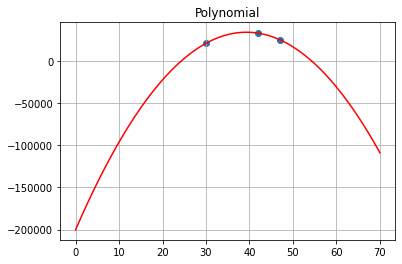

The Pearson Correlation Coefficient is 0.5490961046249901  with a P-value of P = 0.6299441772570746
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,3,1,0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
103    61    1  29.92         3  ...       2          2           2               0
1112   48    1  25.85         3  ...       2          0           2               0
1204   18    1  27.28         3  ...       2          1           2               0

[3 rows x 11 columns]


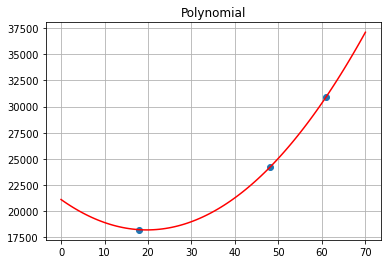

The Pearson Correlation Coefficient is 0.9661632798513446  with a P-value of P = 0.16608159634948252
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,3,1,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,3,1,3
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
494   21    0  25.7         4  ...       2          1           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


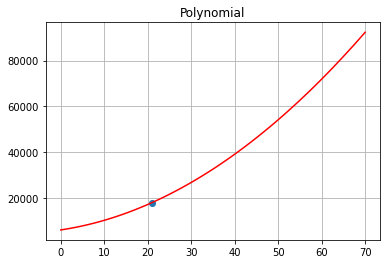

THIS DATAFRAME IS EMPTY:2,1,4,0,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,4,0,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,4,0,2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1307   32    0  28.12         4  ...       2          3           0               0

[1 rows x 11 columns]


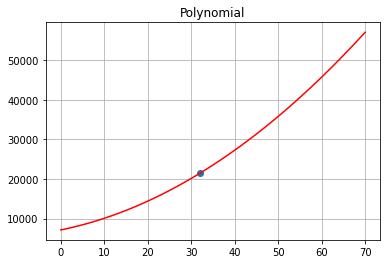

THIS DATAFRAME IS EMPTY:2,1,4,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,4,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,4,1,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,4,1,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,4,1,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:2,1,5,0,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: [

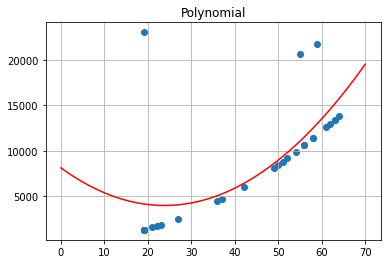

The Pearson Correlation Coefficient is 0.6434082529756332  with a P-value of P = 0.00022124683481039678
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
22     18    0  34.10         0  ...       3          1           3               0
77     21    0  35.53         0  ...       3          1           3               0
97     55    0  38.28         0  ...       3          2           3               0
116    58    0  49.06         0  ...       3          2           3               0
170    63    0  41.47         0  ...       3          2           3               0
190    61    0  31.57         0  ...       3          2           3               0
194    18    0  34.43         0  ...       3          1           3               0
226    28    0  38.06         0  ...       3          3           3               0
247    24    0  35.86         0  ...       3          1           3               0
313    49    0  35.86         0  ...       3          0 

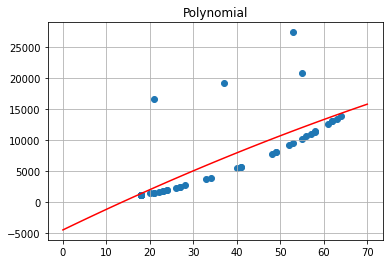

The Pearson Correlation Coefficient is 0.751379665184058  with a P-value of P = 2.731330622266411e-09
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
308    58    0  34.865         0  ...       3          2           3               0
315    52    0  33.250         0  ...       3          2           3               0
317    54    0  32.775         0  ...       3          2           3               0
323    57    0  40.945         0  ...       3          2           3               0
343    63    0  36.765         0  ...       3          2           3               0
353    33    0  35.245         0  ...       3          3           3               0
423    25    0  30.590         0  ...       3          1           3               0
436    22    0  31.730         0  ...       3          1           3               0
519    31    0  30.875         0  ...       3          3           3               0
546    28    0  35.435         0  ...       3   

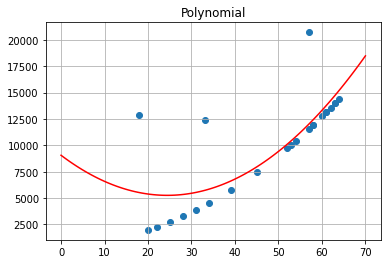

The Pearson Correlation Coefficient is 0.7470880160741935  with a P-value of P = 2.736350401780386e-05
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
75     57    0  34.010         0  ...       3          2           3               0
155    44    0  39.520         0  ...       3          0           3               0
195    19    0  30.590         0  ...       3          1           3               0
245    54    0  30.020         0  ...       3          2           3               0
316    50    0  32.205         0  ...       3          0           3               0
341    62    0  30.020         0  ...       3          2           3               0
477    25    0  35.625         0  ...       3          1           3               0
544    54    0  30.210         0  ...       3          2           3               0
559    19    0  35.530         0  ...       3          1           3               0
581    19    0  30.590         0  ...       3  

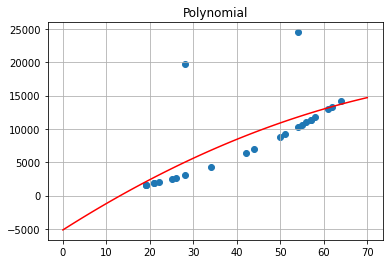

The Pearson Correlation Coefficient is 0.7206767116742965  with a P-value of P = 4.8361048398374406e-05
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
100    41    1  31.6         0  ...       3          0           3               0
127    52    1  37.4         0  ...       3          2           3               0
139    22    1  36.0         0  ...       3          1           3               0
196    39    1  32.8         0  ...       3          3           3               0
208    63    1  31.8         0  ...       3          2           3               0
284    52    1  31.2         0  ...       3          2           3               0
290    28    1  33.4         0  ...       3          3           3               0
433    60    1  30.5         0  ...       3          2           3               0
445    45    1  33.1         0  ...       3          0           3               0
490    19    1  32.9         0  ...       3          1           3

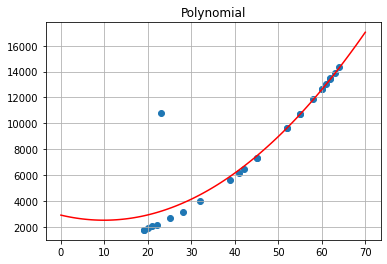

The Pearson Correlation Coefficient is 0.9211312201891072  with a P-value of P = 2.544478857967572e-11
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
13     56    1  39.82         0  ...       3          2           3               0
68     40    1  36.19         0  ...       3          0           3               0
90     21    1  39.49         0  ...       3          1           3               0
181    18    1  38.28         0  ...       3          1           3               0
227    58    1  41.91         0  ...       3          2           3               0
246    60    1  38.06         0  ...       3          2           3               0
257    38    1  40.15         0  ...       3          3           3               0
354    18    1  38.28         0  ...       3          1           3               0
386    58    1  39.05         0  ...       3          2           3               0
399    18    1  38.17         0  ...       3          1  

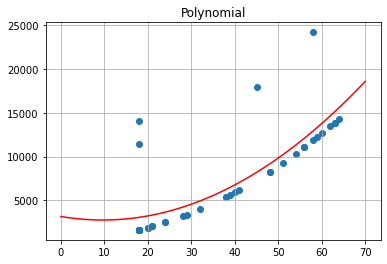

The Pearson Correlation Coefficient is 0.7759867761861375  with a P-value of P = 6.496275122725187e-09
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
20     60    1  36.005         0  ...       3          2           3               0
50     18    1  35.625         0  ...       3          1           3               0
78     22    1  39.805         0  ...       3          1           3               0
81     45    1  38.285         0  ...       3          0           3               0
102    18    1  30.115         0  ...       3          1           3               0
199    64    1  39.330         0  ...       3          2           3               0
221    53    1  33.250         0  ...       3          2           3               0
471    18    1  30.115         0  ...       3          1           3               0
473    47    1  33.345         0  ...       3          0           3               0
485    31    1  31.065         0  ...       3  

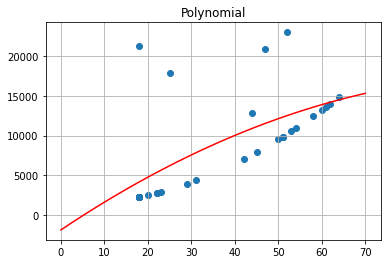

The Pearson Correlation Coefficient is 0.6181674759450013  with a P-value of P = 0.0002722193363433
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
47     28    1  34.770         0  ...       3          3           3               0
79     41    1  32.965         0  ...       3          0           3               0
113    21    1  35.720         0  ...       3          1           3               0
174    24    1  33.345         0  ...       3          1           3               0
200    19    1  32.110         0  ...       3          1           3               0
332    61    1  31.160         0  ...       3          2           3               0
391    19    1  37.430         0  ...       3          1           3               0
402    64    1  32.965         0  ...       3          2           3               0
414    19    1  35.150         0  ...       3          1           3               0
457    57    1  30.495         0  ...       3     

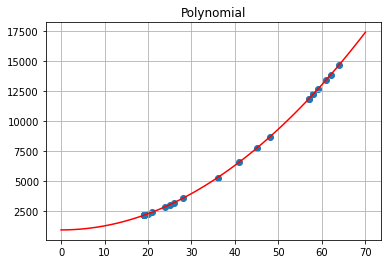

The Pearson Correlation Coefficient is 0.9934028045756589  with a P-value of P = 3.07119120933223e-21
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
162    54    0  39.6         1  ...       3          2           1               0
210    20    0  33.0         1  ...       3          1           1               0
268    45    0  30.2         1  ...       3          0           1               0
361    35    0  30.5         1  ...       3          3           1               0
449    35    0  38.6         1  ...       3          3           1               0
578    52    0  30.2         1  ...       3          2           1               0
620    30    0  31.4         1  ...       3          3           1               0
630    53    0  36.1         1  ...       3          2           1               0
634    51    0  39.7         1  ...       3          0           1               0
691    47    0  36.2         1  ...       3          0           1  

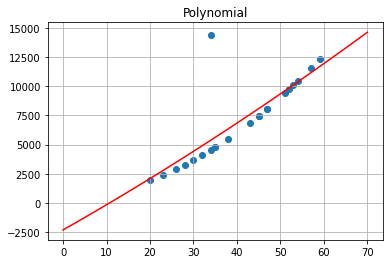

The Pearson Correlation Coefficient is 0.8090171302325029  with a P-value of P = 5.1582821601120175e-06
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1      18    0  33.77         1  ...       3          1           1               0
73     58    0  32.01         1  ...       3          2           1               0
239    44    0  38.06         1  ...       3          0           1               0
379    62    0  31.46         1  ...       3          2           1               0
401    47    0  47.52         1  ...       3          0           1               0
409    32    0  30.03         1  ...       3          3           1               0
418    64    0  39.16         1  ...       3          2           1               0
516    20    0  35.31         1  ...       3          1           1               0
563    50    0  44.77         1  ...       3          0           1               0
627    33    0  42.46         1  ...       3          3 

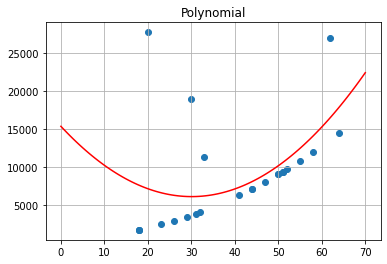

The Pearson Correlation Coefficient is 0.388210951831284  with a P-value of P = 0.060847786637939084
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
44     38    0  37.050         1  ...       3          3           1               0
141    26    0  32.490         1  ...       3          1           1               0
209    40    0  41.230         1  ...       3          0           1               0
319    32    0  37.335         1  ...       3          3           1               0
325    40    0  34.105         1  ...       3          0           1               0
347    46    0  33.345         1  ...       3          0           1               0
392    48    0  31.445         1  ...       3          0           1               0
393    49    0  31.350         1  ...       3          0           1               0
510    56    0  32.110         1  ...       3          2           1               0
528    46    0  39.425         1  ...       3    

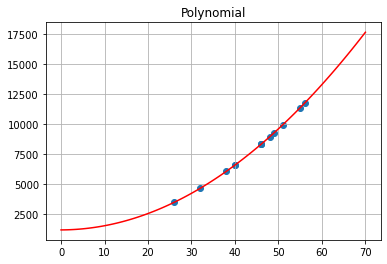

The Pearson Correlation Coefficient is 0.9935305119386892  with a P-value of P = 9.582536702705412e-12
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
110    54    0  33.630         1  ...       3          2           1               0
489    53    0  31.160         1  ...       3          2           1               0
506    22    0  31.350         1  ...       3          1           1               0
692    20    0  32.395         1  ...       3          1           1               0
834    36    0  33.820         1  ...       3          3           1               0
889    57    0  33.630         1  ...       3          2           1               0
959    48    0  36.670         1  ...       3          0           1               0
1013   48    0  32.300         1  ...       3          0           1               0
1059   32    0  33.820         1  ...       3          3           1               0
1210   36    0  30.875         1  ...       3  

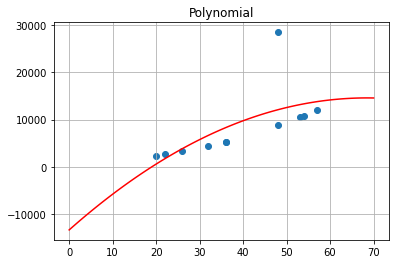

The Pearson Correlation Coefficient is 0.6390183311130857  with a P-value of P = 0.03429242545398938
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
21     30    1  32.4         1  ...       3          3           1               0
173    35    1  34.8         1  ...       3          3           1               0
188    41    1  32.2         1  ...       3          0           1               0
220    34    1  33.7         1  ...       3          3           1               0
483    51    1  39.5         1  ...       3          0           1               0
518    35    1  31.0         1  ...       3          3           1               0
656    26    1  42.4         1  ...       3          1           1               0
694    27    1  34.8         1  ...       3          1           1               0
748    47    1  36.0         1  ...       3          0           1               0
846    51    1  34.2         1  ...       3          0           1   

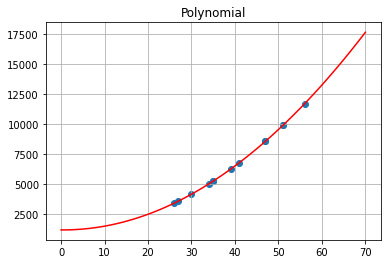

The Pearson Correlation Coefficient is 0.9948585494861981  with a P-value of P = 2.714986155455709e-12
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
6      46    1  33.44         1  ...       3          0           1               0
95     28    1  37.62         1  ...       3          3           1               0
147    51    1  37.73         1  ...       3          0           1               0
201    48    1  32.23         1  ...       3          0           1               0
307    30    1  33.33         1  ...       3          3           1               0
415    43    1  35.64         1  ...       3          0           1               0
443    59    1  36.52         1  ...       3          2           1               0
571    18    1  37.29         1  ...       3          1           1               0
589    38    1  30.69         1  ...       3          3           1               0
651    53    1  39.60         1  ...       3          2  

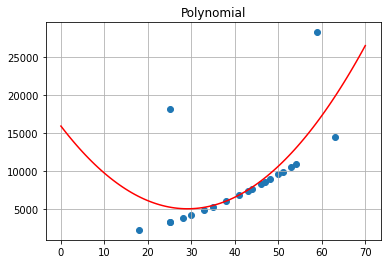

The Pearson Correlation Coefficient is 0.5985436482496571  with a P-value of P = 0.004149794033712925
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
16     52    1  30.780         1  ...       3          2           1               0
228    41    1  31.635         1  ...       3          0           1               0
283    55    1  32.395         1  ...       3          2           1               0
365    49    1  30.780         1  ...       3          0           1               0
372    42    1  33.155         1  ...       3          0           1               0
573    62    1  36.860         1  ...       3          2           1               0
595    46    1  33.725         1  ...       3          0           1               0
597    34    1  33.250         1  ...       3          3           1               0
658    48    1  35.910         1  ...       3          0           1               0
662    32    1  31.540         1  ...       3   

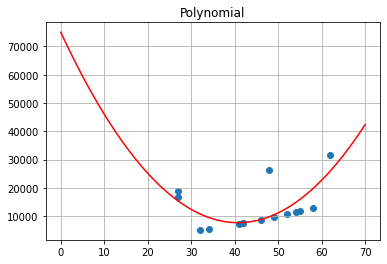

The Pearson Correlation Coefficient is 0.30926735071783873  with a P-value of P = 0.26200997646236046
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
148    53    1  37.430         1  ...       3          2           1               0
168    19    1  31.825         1  ...       3          1           1               0
230    42    1  36.195         1  ...       3          0           1               0
440    31    1  32.680         1  ...       3          3           1               0
566    38    1  40.565         1  ...       3          3           1               0
735    49    1  34.770         1  ...       3          0           1               0
745    50    1  30.115         1  ...       3          0           1               0
806    40    1  41.420         1  ...       3          0           1               0
960    19    1  39.615         1  ...       3          1           1               0
1050   44    1  36.955         1  ...       3   

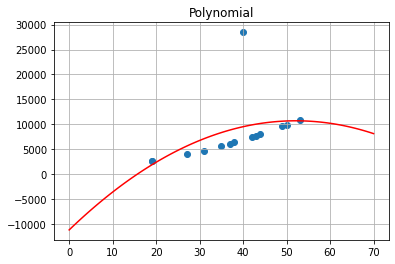

The Pearson Correlation Coefficient is 0.45340969726159036  with a P-value of P = 0.10346285331450238
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
120    44    0  37.1         2  ...       3          0           1               0
129    38    0  34.7         2  ...       3          3           1               0
424    48    0  30.2         2  ...       3          0           1               0
598    43    0  32.6         2  ...       3          0           1               0
946    42    0  35.8         2  ...       3          0           1               0
1131   27    0  45.9         2  ...       3          1           1               0
1144   50    0  32.3         2  ...       3          0           1               0
1168   32    0  35.2         2  ...       3          3           1               0
1309   41    0  32.2         2  ...       3          0           1               0
1329   52    0  38.6         2  ...       3          2           1  

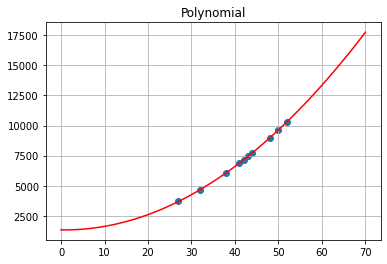

The Pearson Correlation Coefficient is 0.9948219617614776  with a P-value of P = 3.1256327857266744e-09
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
184    44    0  30.69         2  ...       3          0           1               0
237    31    0  38.39         2  ...       3          3           1               0
278    59    0  31.79         2  ...       3          2           1               0
346    33    0  35.75         2  ...       3          3           1               0
454    32    0  46.53         2  ...       3          3           1               0
481    49    0  37.51         2  ...       3          0           1               0
582    39    0  45.43         2  ...       3          3           1               0
592    20    0  31.13         2  ...       3          1           1               0
644    43    0  35.31         2  ...       3          0           1               0
796    30    0  44.22         2  ...       3          3 

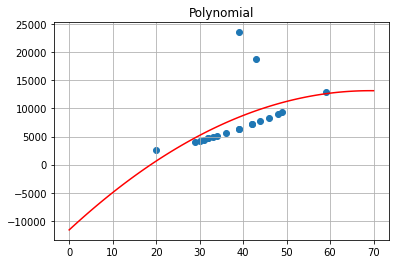

The Pearson Correlation Coefficient is 0.5214544801090932  with a P-value of P = 0.01837703952241604
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
925   50    0  32.11         2  ...       3          0           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


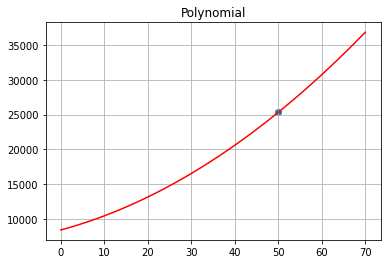

THIS DATAFRAME IS EMPTY:3,0,2,0,2
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
93     35    0  34.770         2  ...       3          3           1               0
107    26    0  30.875         2  ...       3          1           1               0
272    41    0  37.050         2  ...       3          0           1               0
305    29    0  33.345         2  ...       3          3           1               0
368    44    0  32.015         2  ...       3          0           1               0
517    45    0  30.495         2  ...       3          0           1               0
567    41    0  30.590         2  ...       3          0           1               0
657    27    0  33.155         2  ...       3          1           1               0
774    41    0  34.200         2  ...       3          0           1               0
776    40    0  32.300         2  ...       3          0           1               0
851    61    0  32.300         

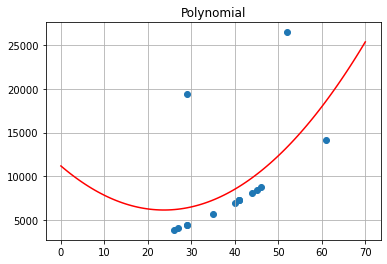

The Pearson Correlation Coefficient is 0.5007835925502133  with a P-value of P = 0.05724568597739988
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
66     61    1  39.1         2  ...       3          2           1               0
132    53    1  35.9         2  ...       3          2           1               0
214    45    1  30.9         2  ...       3          0           1               0
215    41    1  37.1         2  ...       3          0           1               0
304    57    1  38.0         2  ...       3          2           1               0
537    46    1  30.2         2  ...       3          0           1               0
547    54    1  46.7         2  ...       3          2           1               0
611    38    1  34.8         2  ...       3          3           1               0
705    33    1  32.9         2  ...       3          3           1               0
992    50    1  31.6         2  ...       3          0           1   

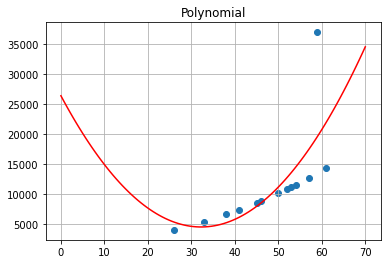

The Pearson Correlation Coefficient is 0.6466052038962791  with a P-value of P = 0.016928406629543875
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
41     31    1  36.63         2  ...       3          3           1               0
43     37    1  30.80         2  ...       3          3           1               0
302    56    1  37.51         2  ...       3          2           1               0
303    28    1  33.00         2  ...       3          3           1               0
383    35    1  43.34         2  ...       3          3           1               0
456    55    1  30.14         2  ...       3          2           1               0
541    20    1  31.79         2  ...       3          1           1               0
564    18    1  32.12         2  ...       3          1           1               0
572    30    1  43.12         2  ...       3          3           1               0
650    49    1  42.68         2  ...       3          0   

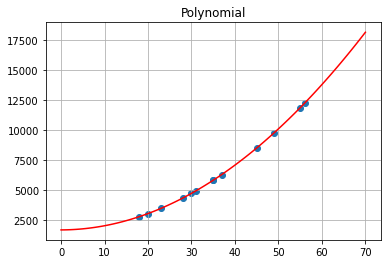

The Pearson Correlation Coefficient is 0.989023391918342  with a P-value of P = 1.739929207586811e-10
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
46     18    1  38.665         2  ...       3          1           1               0
56     58    1  31.825         2  ...       3          2           1               0
286    46    1  48.070         2  ...       3          0           1               0
334    43    1  35.720         2  ...       3          0           1               0
360    48    1  32.300         2  ...       3          0           1               0
394    46    1  32.300         2  ...       3          0           1               0
405    52    1  38.380         2  ...       3          2           1               0
462    62    1  38.095         2  ...       3          2           1               0
574    57    1  34.295         2  ...       3          2           1               0
637    35    1  38.095         2  ...       3   

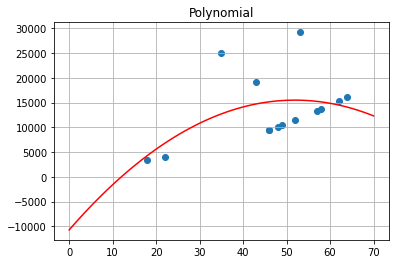

The Pearson Correlation Coefficient is 0.40985818850228306  with a P-value of P = 0.14554979587455905
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
27     55    1  32.775         2  ...       3          2           1               0
51     21    1  33.630         2  ...       3          1           1               0
59     34    1  37.335         2  ...       3          3           1               0
189    29    1  32.110         2  ...       3          3           1               0
309    41    1  33.060         2  ...       3          0           1               0
467    56    1  33.820         2  ...       3          2           1               0
526    19    1  30.590         2  ...       3          1           1               0
553    52    1  31.730         2  ...       3          2           1               0
599    52    1  37.525         2  ...       3          2           1               0
712    43    1  30.685         2  ...       3   

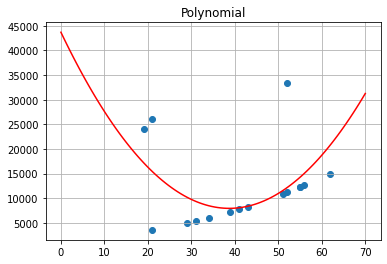

The Pearson Correlation Coefficient is 0.06291694107941369  with a P-value of P = 0.8169408472161362
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
222    32    0  30.8         3  ...       3          3           1               0
243    40    0  35.3         3  ...       3          0           1               0
253    27    0  30.3         3  ...       3          1           1               0
484    48    0  34.3         3  ...       3          0           1               0
678    56    0  36.1         3  ...       3          2           1               0
721    53    0  36.6         3  ...       3          2           1               0
770    61    0  36.1         3  ...       3          2           1               0
817    23    0  37.1         3  ...       3          1           1               0
880    22    0  34.8         3  ...       3          1           1               0
908    63    0  39.8         3  ...       3          2           1   

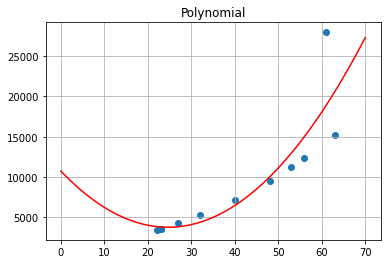

The Pearson Correlation Coefficient is 0.8448604197290676  with a P-value of P = 0.0010624260270967192
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
2      28    0  33.00         3  ...       3          3           1               0
225    55    0  33.88         3  ...       3          2           1               0
356    46    0  43.89         3  ...       3          0           1               0
435    60    0  33.11         3  ...       3          2           1               0
660    37    0  46.53         3  ...       3          3           1               0
670    30    0  31.57         3  ...       3          3           1               0
775    51    0  33.33         3  ...       3          0           1               0
778    35    0  34.32         3  ...       3          3           1               0
1079   63    0  33.66         3  ...       3          2           1               0

[9 rows x 11 columns]


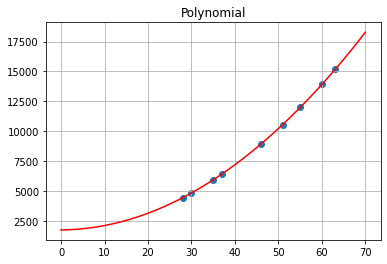

The Pearson Correlation Coefficient is 0.9952938931167792  with a P-value of P = 2.3434978392072798e-08
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
114   52    0  32.205         3  ...       3          2           1               0
369   18    0  30.400         3  ...       3          1           1               0
645   48    0  30.780         3  ...       3          0           1               0
758   30    0  37.430         3  ...       3          3           1               0
906   27    0  32.585         3  ...       3          1           1               0

[5 rows x 11 columns]


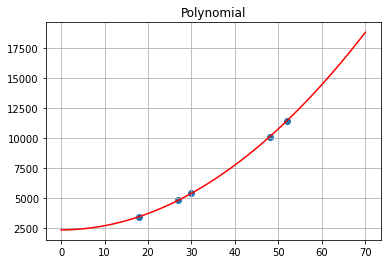

The Pearson Correlation Coefficient is 0.9934811605296218  with a P-value of P = 0.000631195897097217
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
403    49    0  32.300         3  ...       3          0           1               0
480    63    0  41.325         3  ...       3          2           1               0
505    37    0  30.875         3  ...       3          3           1               0
986    43    0  30.115         3  ...       3          0           1               0
1145   52    0  32.775         3  ...       3          2           1               0
1258   55    0  37.715         3  ...       3          2           1               0
1320   31    0  31.065         3  ...       3          3           1               0
1333   50    0  30.970         3  ...       3          0           1               0

[8 rows x 11 columns]


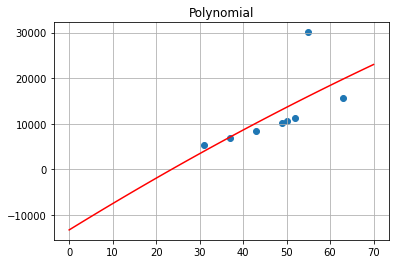

The Pearson Correlation Coefficient is 0.646808511729701  with a P-value of P = 0.0830304150348688
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
96     54    1  30.8         3  ...       3          2           1               0
187    30    1  30.9         3  ...       3          3           1               0
396    43    1  34.4         3  ...       3          0           1               0
536    33    1  38.9         3  ...       3          3           1               0
540    34    1  38.0         3  ...       3          3           1               0
732    24    1  30.1         3  ...       3          1           1               0
734    59    1  32.1         3  ...       3          2           1               0
810    46    1  30.8         3  ...       3          0           1               0
996    39    1  34.1         3  ...       3          3           1               0
1141   41    1  32.6         3  ...       3          0           1     

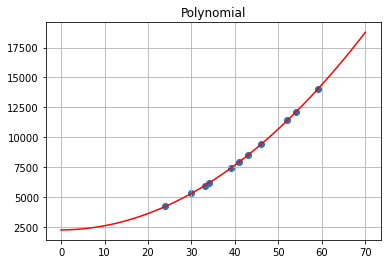

The Pearson Correlation Coefficient is 0.9924728230304919  with a P-value of P = 1.6127678533855092e-09
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
138   54    1  31.90         3  ...       3          2           1               0
145   29    1  38.83         3  ...       3          3           1               0
264   53    1  38.06         3  ...       3          2           1               0
459   40    1  33.00         3  ...       3          0           1               0
460   49    1  36.63         3  ...       3          0           1               0
603   64    1  39.05         3  ...       3          2           1               0
676   55    1  40.81         3  ...       3          2           1               0

[7 rows x 11 columns]


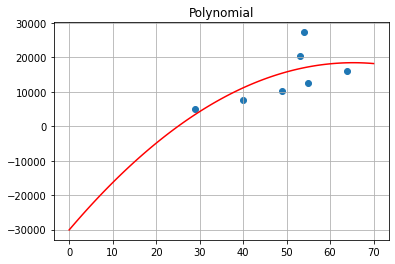

The Pearson Correlation Coefficient is 0.6591790331812643  with a P-value of P = 0.10727398696589535
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
152   32    1  37.145         3  ...       3          3           1               0
179   41    1  33.155         3  ...       3          0           1               0
267   59    1  32.395         3  ...       3          2           1               0
366   56    1  32.300         3  ...       3          2           1               0
708   31    1  30.495         3  ...       3          3           1               0
978   45    1  39.995         3  ...       3          0           1               0
998   33    1  36.290         3  ...       3          3           1               0

[7 rows x 11 columns]


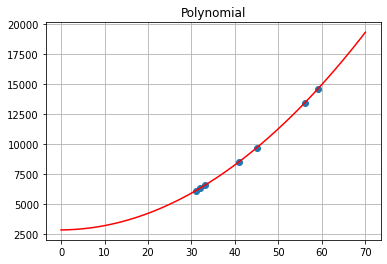

The Pearson Correlation Coefficient is 0.9969639766757006  with a P-value of P = 9.738899379209388e-07
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
36     62    1  32.965         3  ...       3          2           1               0
124    47    1  33.915         3  ...       3          0           1               0
167    32    1  33.155         3  ...       3          3           1               0
378    64    1  30.115         3  ...       3          2           1               0
389    24    1  30.210         3  ...       3          1           1               0
429    27    1  30.400         3  ...       3          1           1               0
643    23    1  34.960         3  ...       3          1           1               0
811    33    1  42.940         3  ...       3          3           1               0
1018   54    1  35.815         3  ...       3          2           1               0
1219   38    1  30.210         3  ...       3  

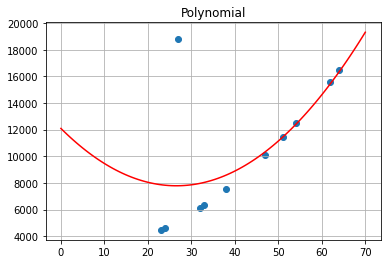

The Pearson Correlation Coefficient is 0.6021717251239596  with a P-value of P = 0.04995043182228897
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,0,4,0,0
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
61    25    0  33.66         4  ...       3          1           1               0
639   56    0  33.66         4  ...       3          2           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


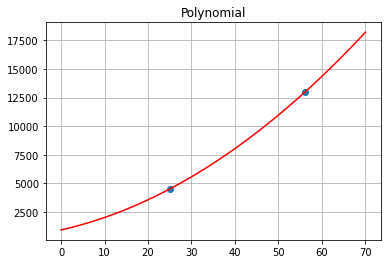

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
390    48    0  35.625         4  ...       3          0           1               0
754    24    0  33.630         4  ...       3          1           1               0
1318   35    0  39.710         4  ...       3          3           1               0

[3 rows x 11 columns]


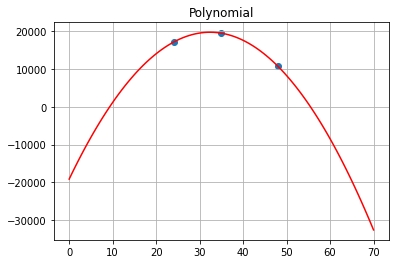

The Pearson Correlation Coefficient is -0.7385229070610173  with a P-value of P = 0.4710473170481524
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
211   40    0  30.875         4  ...       3          0           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


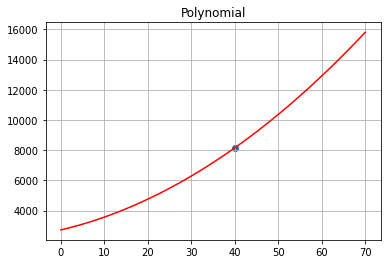

THIS DATAFRAME IS EMPTY:3,0,4,0,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1094   50    1  33.7         4  ...       3          0           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


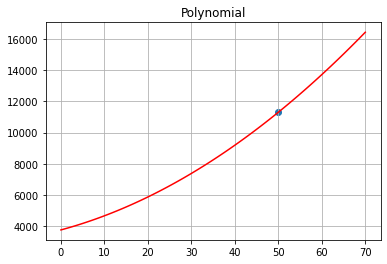

THIS DATAFRAME IS EMPTY:3,0,4,1,0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
344    49    1  41.47         4  ...       3          0           1               0
1012   61    1  33.33         4  ...       3          2           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


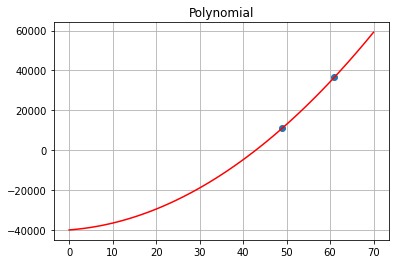

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
1095   18    1  31.35         4  ...       3          1           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


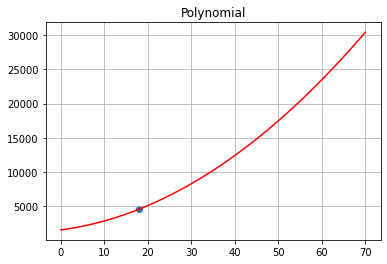

THIS DATAFRAME IS EMPTY:3,0,4,1,2
    age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
83   48    1  41.23         4  ...       3          0           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


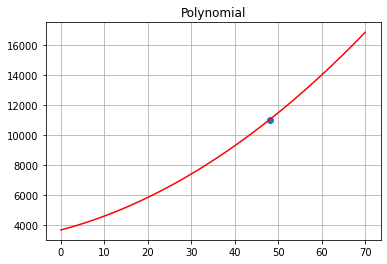

THIS DATAFRAME IS EMPTY:3,0,4,1,3
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
640   33    0  42.4         5  ...       3          3           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


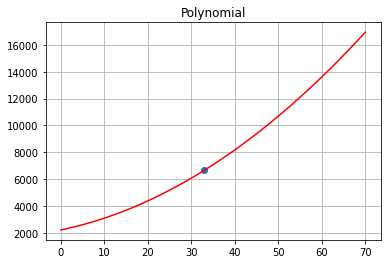

THIS DATAFRAME IS EMPTY:3,0,5,0,0
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
877   33    0  33.44         5  ...       3          3           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


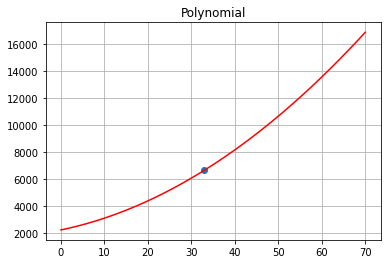

THIS DATAFRAME IS EMPTY:3,0,5,0,1
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
984   20    0  30.115         5  ...       3          1           1               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


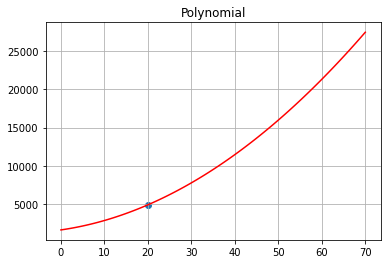

THIS DATAFRAME IS EMPTY:3,0,5,0,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,0,5,0,3
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
166   20    1  37.0         5  ...       3          1           1               0
568   49    1  31.9         5  ...       3          0           1               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


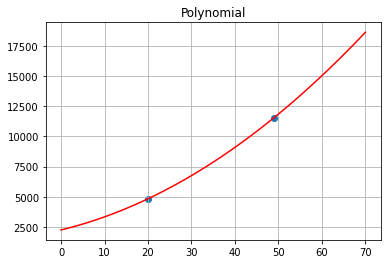

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
438   52    1  46.75         5  ...       3          2           1               0
969   39    1  34.32         5  ...       3          3           1               0

[2 rows x 11 columns]


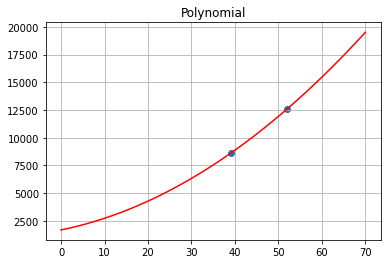

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,0,5,1,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,0,5,1,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
19     30    0  35.3         0  ...       3          3           0               0
30     22    0  35.6         0  ...       3          1           0               0
39     60    0  39.9         0  ...       3          2           0               0
223    19    0  34.8         0  ...       3          1           0               0
322    34    0  30.8         0  ...       3          3           0               0
461    42    0  30.0         0  ...       3          0           0               0
500    29    0 

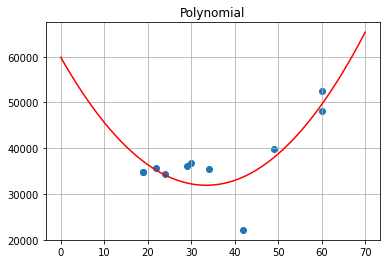

The Pearson Correlation Coefficient is 0.6023784745597405  with a P-value of P = 0.04985098614160576
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
14     27    0  42.13         0  ...       3          1           0               0
53     36    0  34.43         0  ...       3          3           0               0
109    63    0  35.09         0  ...       3          2           0               0
158    30    0  35.53         0  ...       3          3           0               0
377    24    0  40.15         0  ...       3          1           0               0
420    64    0  33.88         0  ...       3          2           0               0
421    61    0  35.86         0  ...       3          2           0               0
503    19    0  30.25         0  ...       3          1           0               0
759    18    0  38.17         0  ...       3          1           0               0
901    60    0  40.92         0  ...       3          2    

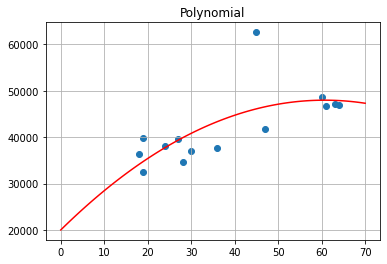

The Pearson Correlation Coefficient is 0.6658838996380412  with a P-value of P = 0.009330251562051303
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
254    50    0  31.825         0  ...       3          0           0               0
381    55    0  30.685         0  ...       3          2           0               0
623    18    0  33.535         0  ...       3          1           0               0
668    62    0  32.015         0  ...       3          2           0               0
742    53    0  34.105         0  ...       3          2           0               0
911    18    0  31.730         0  ...       3          1           0               0
1042   20    0  30.685         0  ...       3          1           0               0
1267   24    0  31.065         0  ...       3          1           0               0

[8 rows x 11 columns]


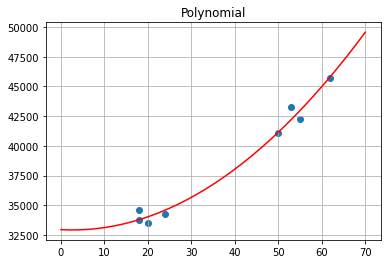

The Pearson Correlation Coefficient is 0.987315343022584  with a P-value of P = 5.054001155978333e-06
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
256   56    0  33.630         0  ...       3          2           0               0
259   19    0  31.920         0  ...       3          1           0               0
263   19    0  36.955         0  ...       3          1           0               0

[3 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


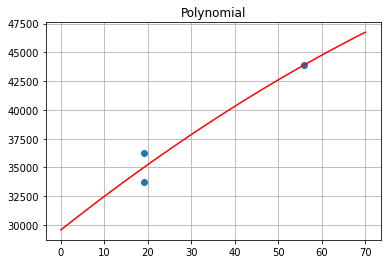

The Pearson Correlation Coefficient is 0.9725452681348197  with a P-value of P = 0.14952106556858585
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
175    63    1  37.7         0  ...       3          2           2               0
314    27    1  31.4         0  ...       3          1           2               0
441    33    1  33.5         0  ...       3          3           2               0
1120   23    1  31.4         0  ...       3          1           2               0
1308   25    1  30.2         0  ...       3          1           2               0

[5 rows x 11 columns]


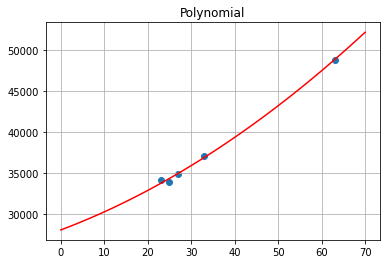

The Pearson Correlation Coefficient is 0.9978972224477367  with a P-value of P = 0.00011571424461087214
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
161    18    1  36.85         0  ...       3          1           2               0
203    27    1  36.08         0  ...       3          1           2               0
488    44    1  38.06         0  ...       3          0           2               0
543    54    1  47.41         0  ...       3          2           2               0
549    43    1  46.20         0  ...       3          0           2               0
618    19    1  33.11         0  ...       3          1           2               0
706    51    1  38.06         0  ...       3          0           2               0
736    37    1  38.39         0  ...       3          3           2               0
803    18    1  42.24         0  ...       3          1           2               0
845    60    1  32.45         0  ...       3          2 

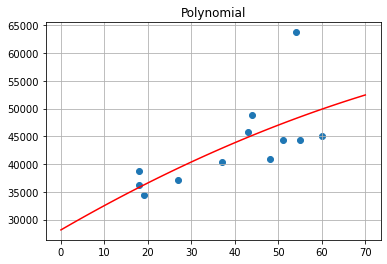

The Pearson Correlation Coefficient is 0.6776352510348961  with a P-value of P = 0.01546133513626914
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
850   37    1  30.78         0  ...       3          3           2               0
852   46    1  35.53         0  ...       3          0           2               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


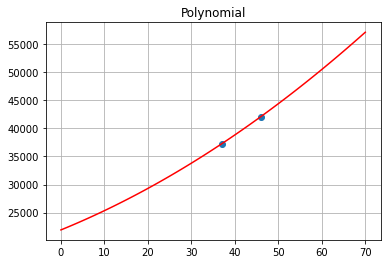

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
86     57    1  31.16         0  ...       3          2           2               0
629    44    1  38.95         0  ...       3          0           2               0
819    33    1  35.53         0  ...       3          3           2               0
1093   22    1  30.40         0  ...       3          1           2               0
1139   19    1  32.49         0  ...       3          1           2               0
1196   19    1  30.02         0  ...       3          1           2               0

[6 rows x 11 columns]


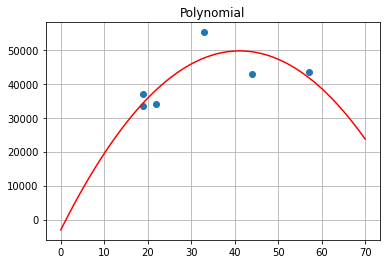

The Pearson Correlation Coefficient is 0.5124416812957036  with a P-value of P = 0.298620168075156
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
34     28    0  36.4         1  ...       3          3           0               0
1284   61    0  36.3         1  ...       3          2           0               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


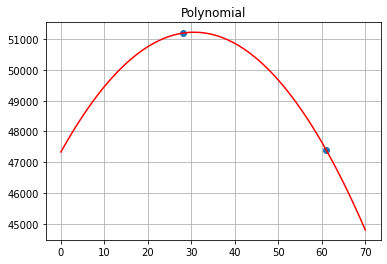

The Pearson Correlation Coefficient is -1.0  with a P-value of P = 1.0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
49     36    0  35.20         1  ...       3          3           0               0
82     22    0  37.62         1  ...       3          1           0               0
530    57    0  42.13         1  ...       3          2           0               0
689    27    0  31.13         1  ...       3          1           0               0
697    41    0  35.75         1  ...       3          0           0               0
956    54    0  30.80         1  ...       3          2           0               0
1022   47    0  36.08         1  ...       3          0           0               0
1047   22    0  52.58         1  ...       3          1           0               0
1062   59    0  41.14         1  ...       3          2           0               0
1070   37    0  37.07         1  ...       3          3           0               0
1118 

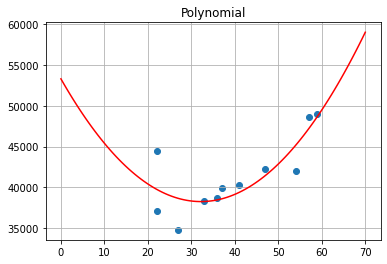

The Pearson Correlation Coefficient is 0.7043192231431576  with a P-value of P = 0.015537962513356698
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
38     35    0  36.670         1  ...       3          3           0               0
123    44    0  31.350         1  ...       3          0           0               0
338    50    0  32.300         1  ...       3          0           0               0
422    40    0  32.775         1  ...       3          0           0               0
947    37    0  34.200         1  ...       3          3           0               0
958    43    0  34.960         1  ...       3          0           0               0
1249   32    0  33.630         1  ...       3          3           0               0

[7 rows x 11 columns]


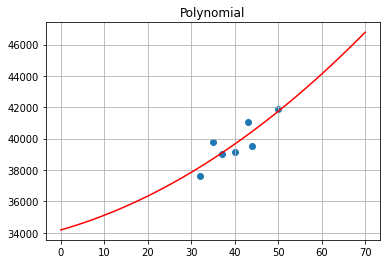

The Pearson Correlation Coefficient is 0.8542904907743459  with a P-value of P = 0.014368212642828579
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,1,1,0,3
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
328    64    1  33.8         1  ...       3          2           2               0
1218   46    1  34.6         1  ...       3          0           2               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


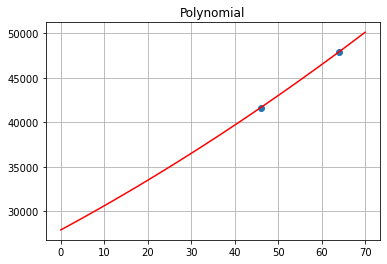

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
615   47    1  36.63         1  ...       3          0           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


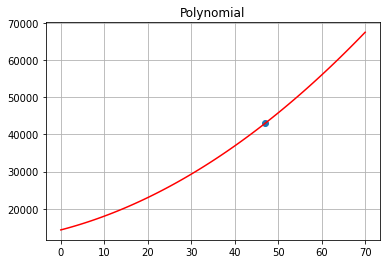

THIS DATAFRAME IS EMPTY:3,1,1,1,1
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
23     34    1  31.920         1  ...       3          3           2               0
288    59    1  36.765         1  ...       3          2           2               0
330    61    1  36.385         1  ...       3          2           2               0
577    31    1  38.095         1  ...       3          3           2               0
1124   23    1  42.750         1  ...       3          1           2               0

[5 rows x 11 columns]


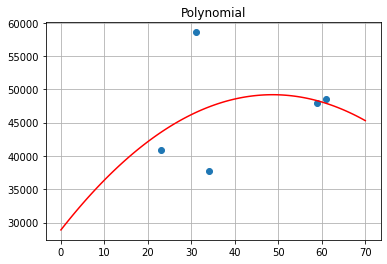

The Pearson Correlation Coefficient is 0.19086030356688977  with a P-value of P = 0.7584726686250634
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
587    34    1  30.210         1  ...       3          3           2               0
1037   45    1  30.495         1  ...       3          0           2               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


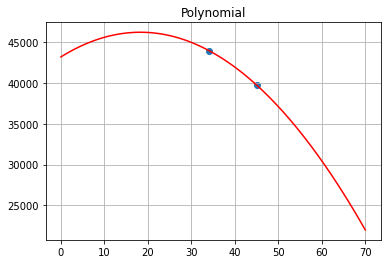

The Pearson Correlation Coefficient is -1.0  with a P-value of P = 1.0
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
29     31    0  36.3         2  ...       3          3           0               0
271    50    0  34.2         2  ...       3          0           0               0
373    26    0  32.9         2  ...       3          1           0               0
609    30    0  37.8         2  ...       3          3           0               0
682    39    0  35.3         2  ...       3          3           0               0
739    29    0  35.5         2  ...       3          3           0               0
953    44    0  30.2         2  ...       3          0           0               0
1207   36    0  33.4         2  ...       3          3           0               0
1288   20    0  39.4         2  ...       3          1           0               0

[9 rows x 11 columns]


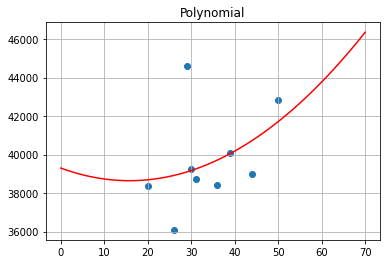

The Pearson Correlation Coefficient is 0.3738277162845464  with a P-value of P = 0.321648979235802
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
57     18    0  31.68         2  ...       3          1           0               0
252    54    0  34.21         2  ...       3          2           0               0
292    25    0  45.54         2  ...       3          1           0               0
665    43    0  38.06         2  ...       3          0           0               0
826    56    0  31.79         2  ...       3          2           0               0
893    47    0  38.94         2  ...       3          0           0               0
951    51    0  42.90         2  ...       3          0           0               0
1036   22    0  37.07         2  ...       3          1           0               0
1117   25    0  33.33         2  ...       3          1           0               0
1240   52    0  41.80         2  ...       3          2      

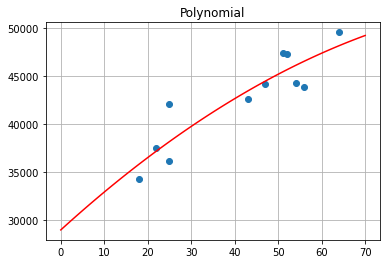

The Pearson Correlation Coefficient is 0.904063836232819  with a P-value of P = 0.00013353209591072569
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,1,2,0,2
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
55    58    0  36.955         2  ...       3          2           0               0
327   45    0  36.480         2  ...       3          0           0               0
569   48    0  40.565         2  ...       3          0           0               0

[3 rows x 11 columns]


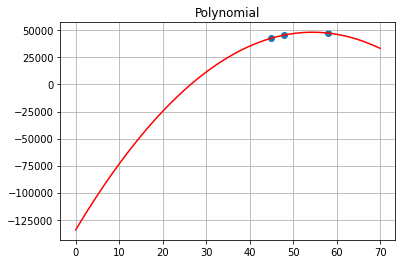

The Pearson Correlation Coefficient is 0.904606194365933  with a P-value of P = 0.2803300424253878
      age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
84     37    1  34.8         2  ...       3          3           2               0
94     64    1  31.3         2  ...       3          2           2               0
251    63    1  32.2         2  ...       3          2           2               0
860    37    1  47.6         2  ...       3          3           2               0
1313   19    1  34.7         2  ...       3          1           2               0

[5 rows x 11 columns]


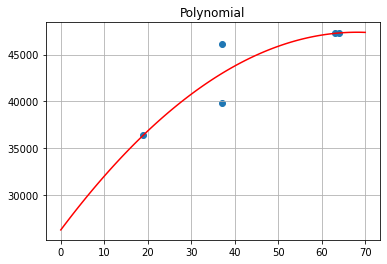

The Pearson Correlation Coefficient is 0.8667366482119454  with a P-value of P = 0.05721665176883327
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
674    44    1  43.89         2  ...       3          0           2               0
842    23    1  32.78         2  ...       3          1           2               0
1323   42    1  40.37         2  ...       3          0           2               0

[3 rows x 11 columns]


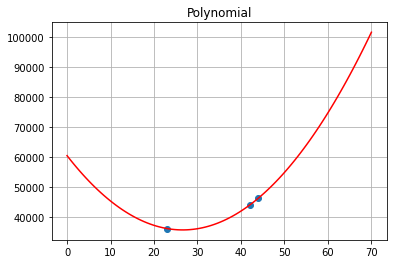

The Pearson Correlation Coefficient is 0.991406333239783  with a P-value of P = 0.08352103770675902
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
240    23    1  36.67         2  ...       3          1           2               0
1096   51    1  34.96         2  ...       3          0           2               0

[2 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


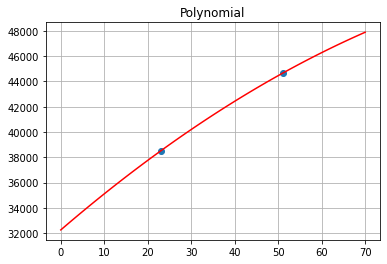

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
667   40    1  32.775         2  ...       3          0           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


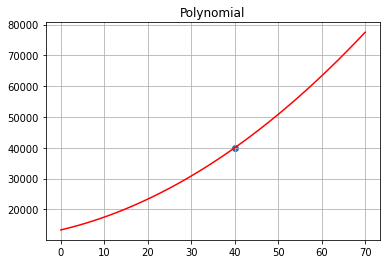

THIS DATAFRAME IS EMPTY:3,1,2,1,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,1,3,0,0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
265    46    0  42.35         3  ...       3          0           0               0
312    43    0  35.97         3  ...       3          0           0               0
1111   38    0  38.39         3  ...       3          3           0               0

[3 rows x 11 columns]


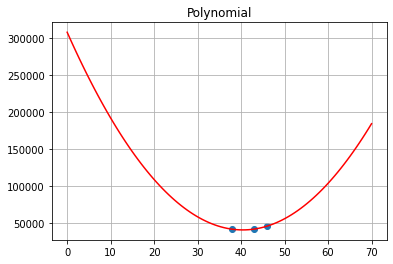

The Pearson Correlation Coefficient is 0.807986579914724  with a P-value of P = 0.4011146810127015
     age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
185   36    0  41.895         3  ...       3          3           0               0
281   54    0  40.565         3  ...       3          2           0               0
738   23    0  31.730         3  ...       3          1           0               0
828   41    0  30.780         3  ...       3          0           0               0

[4 rows x 11 columns]


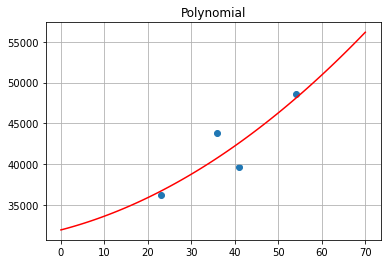

The Pearson Correlation Coefficient is 0.8825178840581912  with a P-value of P = 0.1174821159418088
      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
146    46    0  30.495         3  ...       3          0           0               0
298    31    0  34.390         3  ...       3          3           0               0
677    60    0  31.350         3  ...       3          2           0               0
1186   20    0  35.625         3  ...       3          1           0               0
1230   52    0  34.485         3  ...       3          2           0               0
1301   62    0  30.875         3  ...       3          2           0               0

[6 rows x 11 columns]


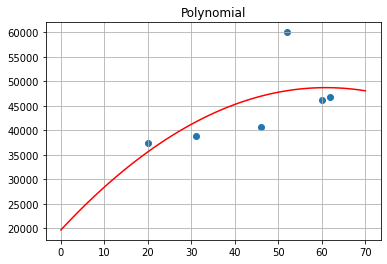

The Pearson Correlation Coefficient is 0.6127908577437382  with a P-value of P = 0.1958690683344533
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,1,3,1,0
      age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
725    30    1  39.05         3  ...       3          3           2               0
1021   22    1  31.02         3  ...       3          1           2               0
1152   43    1  32.56         3  ...       3          0           2               0

[3 rows x 11 columns]


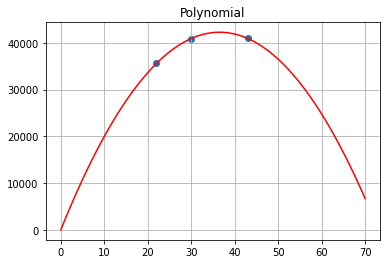

The Pearson Correlation Coefficient is 0.7907451140325673  with a P-value of P = 0.41938668698023046
     age  sex    bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
883   51    1  37.05         3  ...       3          0           2               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


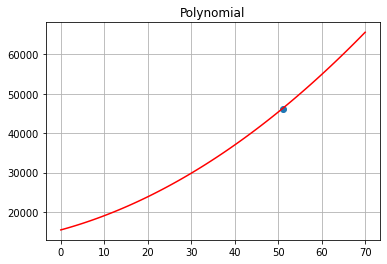

THIS DATAFRAME IS EMPTY:3,1,3,1,2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
558    35    1  34.105         3  ...       3          3           2               0
1122   53    1  36.860         3  ...       3          2           2               0

[2 rows x 11 columns]


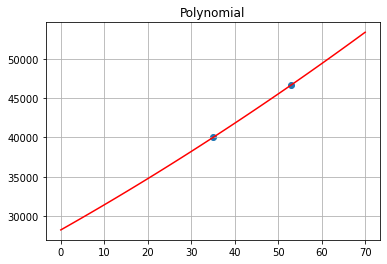

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
     age  sex   bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
621   37    0  34.1         4  ...       3          3           0               0

[1 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


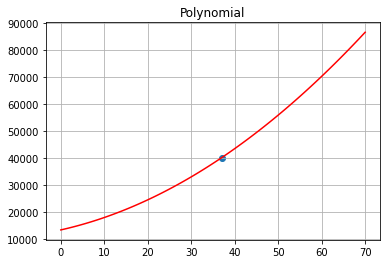

THIS DATAFRAME IS EMPTY:3,1,4,0,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,1,4,0,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,1,4,0,2
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,1,4,0,3
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,1,4,1,0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: []
THIS DATAFRAME IS EMPTY:3,1,4,1,1
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmicat, k cluster, gm cluster, DBSCAN cluster]
Index: [

In [34]:
nodatalist = [] 
somedatalist = []
gooddatalist = []
for bminum in range(0,4):
    for smokenum in range(0,2):
        for childnum in range(0,6):
            for sexnum in range(0,2):
                for regionnum in range(0,4):
                    try:
                        df_test = df_cats[(df_cats['bmicat']==bminum)& 
                                          (df_cats["smoker"]==smokenum)& 
                                          (df_cats["children"]==childnum)& 
                                          (df_cats["sex"]==sexnum)& 
                                          (df_cats["region"]==regionnum)]
                        print(df_test)
                        mypoly = np.poly1d(np.polyfit(df_test["age"], df_test["charges"], 2))
                        lin = np.linspace(0, 70, 100)
                        plt.plot(lin, mypoly(lin), c='r',linestyle='-')
                        plt.title('Polynomial')
                        plt.grid(True)
                        plt.scatter(df_test["age"], df_test["charges"])
                        #plt.figure(figsize=(10,6))
                        plt.show()
                        #print(df_test[["age","charges"]].corr())
                        pearson_coef, p_value = stats.pearsonr(df_test['age'], df_test['charges'])
                        print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
                        somedatalist.append([bminum,smokenum,childnum,sexnum,regionnum])
                        if (p_value <= 0.05) and (pearson_coef >= 0.95):
                          gooddatalist.append([bminum,smokenum,childnum,sexnum,regionnum])
                    except:
                        print("THIS DATAFRAME IS EMPTY:{},{},{},{},{}".format(bminum,smokenum,childnum,sexnum,regionnum))
                        nodatalist.append([bminum,smokenum,childnum,sexnum,regionnum])

      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
24     37    0  28.025         2  ...       2          3           1               0
143    29    0  29.735         2  ...       2          3           1               0
176    38    0  27.835         2  ...       2          3           1               0
212    24    0  28.500         2  ...       2          1           1               0
387    50    0  25.365         2  ...       2          0           1               0
1039   19    0  27.265         2  ...       2          1           1               0
1173   38    0  29.260         2  ...       2          3           1               0
1298   33    0  27.455         2  ...       2          3           1               0

[8 rows x 11 columns]
              age   charges
age      1.000000  0.202327
charges  0.202327  1.000000
The Pearson Correlation Coefficient is 0.2023265961238588  with a P-value of P = 0.6308635531359934


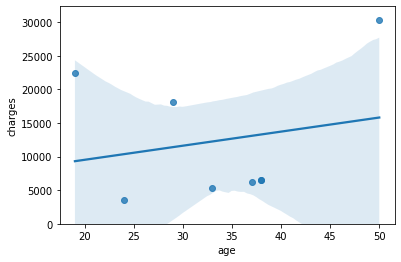

In [35]:
df_test = gm_df_cats[(gm_df_cats['bmicat']==2)& (gm_df_cats["smoker"]==0)& (gm_df_cats["children"]==2)& (gm_df_cats["sex"]==0)& 
                  (gm_df_cats["region"]==3)]
print(df_test)
sns.regplot(x="age", y="charges", data=df_test)
plt.ylim(0,)
print(df_test[["age","charges"]].corr())
pearson_coef, p_value = stats.pearsonr(df_test['age'], df_test['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

      age  sex     bmi  children  ...  bmicat  k cluster  gm cluster  DBSCAN cluster
24     37    0  28.025         2  ...       2          3           1               0
143    29    0  29.735         2  ...       2          3           1               0
176    38    0  27.835         2  ...       2          3           1               0
212    24    0  28.500         2  ...       2          1           1               0
387    50    0  25.365         2  ...       2          0           1               0
1039   19    0  27.265         2  ...       2          1           1               0
1173   38    0  29.260         2  ...       2          3           1               0
1298   33    0  27.455         2  ...       2          3           1               0

[8 rows x 11 columns]


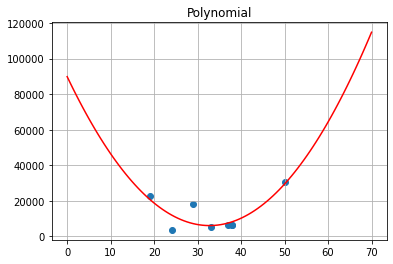

              age   charges
age      1.000000  0.202327
charges  0.202327  1.000000
The Pearson Correlation Coefficient is 0.2023265961238588  with a P-value of P = 0.6308635531359934


In [36]:
df_test = gm_df_cats[(gm_df_cats['bmicat']==2)  & (gm_df_cats["smoker"]==0)& (gm_df_cats["children"]==2)& (gm_df_cats["sex"]==0)& 
                  (gm_df_cats["region"]==3)]
print(df_test)
mypoly = np.poly1d(np.polyfit(df_test["age"], df_test["charges"], 2))
lin = np.linspace(0, 70, 100)
plt.plot(lin, mypoly(lin), c='r',linestyle='-')
plt.title('Polynomial')
plt.grid(True)
plt.scatter(df_test["age"], df_test["charges"],)
#plt.figure(figsize=(10,6))
plt.show()
print(df_test[["age","charges"]].corr())
pearson_coef, p_value = stats.pearsonr(df_test['age'], df_test['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

In [37]:
print(len(gooddatalist))

47


In [38]:
"""
sns.scatterplot(x=gm_df_cats["age"], y=gm_df_cats["charges"], hue=gm_df_cats["gm cluster"])
"""

'\nsns.scatterplot(x=gm_df_cats["age"], y=gm_df_cats["charges"], hue=gm_df_cats["gm cluster"])\n'

In [39]:
"""
import numpy as np
import matplotlib.pyplot as plt
# Creating a numpy array
X = np.array([1,2,3,-1,-2])
Y = np.array([6,1,-4,2,5])
# Plotting point using scatter method
plt.scatter(X,Y)
plt.show()
"""


'\nimport numpy as np\nimport matplotlib.pyplot as plt\n# Creating a numpy array\nX = np.array([1,2,3,-1,-2])\nY = np.array([6,1,-4,2,5])\n# Plotting point using scatter method\nplt.scatter(X,Y)\nplt.show()\n'

In [40]:
"""
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter([random.randint(1, 1000) % 50 for i in range(100)],
[random.randint(1, 1000) % 50 for i in range(100)])
ax.plot([1, 2, 4, 50], [1, 2, 4, 50])

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()
"""

"\nimport random\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(4, 3))\nax = plt.axes()\nax.scatter([random.randint(1, 1000) % 50 for i in range(100)],\n[random.randint(1, 1000) % 50 for i in range(100)])\nax.plot([1, 2, 4, 50], [1, 2, 4, 50])\n\nax.set_xlabel('x')\nax.set_ylabel('y')\n\nplt.show()\n"

In [41]:
"""
TO BE EDITED
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
 
grid = GridSearchCV(gm(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))
"""

"\nTO BE EDITED\nfrom sklearn.model_selection import GridSearchCV\n \nparam_grid = {'C': [0.1, 1, 10, 100, 1000],\n              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],\n              'kernel': ['rbf','linear']}\n \ngrid = GridSearchCV(gm(), param_grid, refit = True, verbose = 3)\n \n# fitting the model for grid search\ngrid.fit(X_train, y_train)\n\n# print best parameter after tuning\nprint(grid.best_params_)\n \n# print how our model looks after hyper-parameter tuning\nprint(grid.best_estimator_)\n\ngrid_predictions = grid.predict(X_test)\n \n# print classification report\nprint(classification_report(y_test, grid_predictions))\n"